## **Trend Analysis**

We would use two basic packages below,

**Guidelines:**

- **yahoo finance api** : https://github.com/ranaroussi/yfinance

- **Candlestick chart** : https://github.com/matplotlib/mplfinance

In [1]:
import yfinance as yf
import mplfinance as mpf
from pandas_datareader import data as pdr
yf.pdr_override()

In [2]:
yf.pdr_override()
def get_data(stock_code,start,end):
    data=pdr.get_data_yahoo(tickers=stock_code,
                            interval='1d',
                            start=start,
                            end=end)
    return data
# An example, this api could take a little while to fetch the data
# JUST BE PATIENT
data=get_data('AAPL','2015-01-01','2020-11-13')
data.head()    

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2015-01-02  27.847500  27.860001  26.837500  27.332500  24.696352  212818400
2015-01-05  27.072500  27.162500  26.352501  26.562500  24.000614  257142000
2015-01-06  26.635000  26.857500  26.157499  26.565001  24.002876  263188400
2015-01-07  26.799999  27.049999  26.674999  26.937500  24.339447  160423600
2015-01-08  27.307501  28.037500  27.174999  27.972500  25.274624  237458000

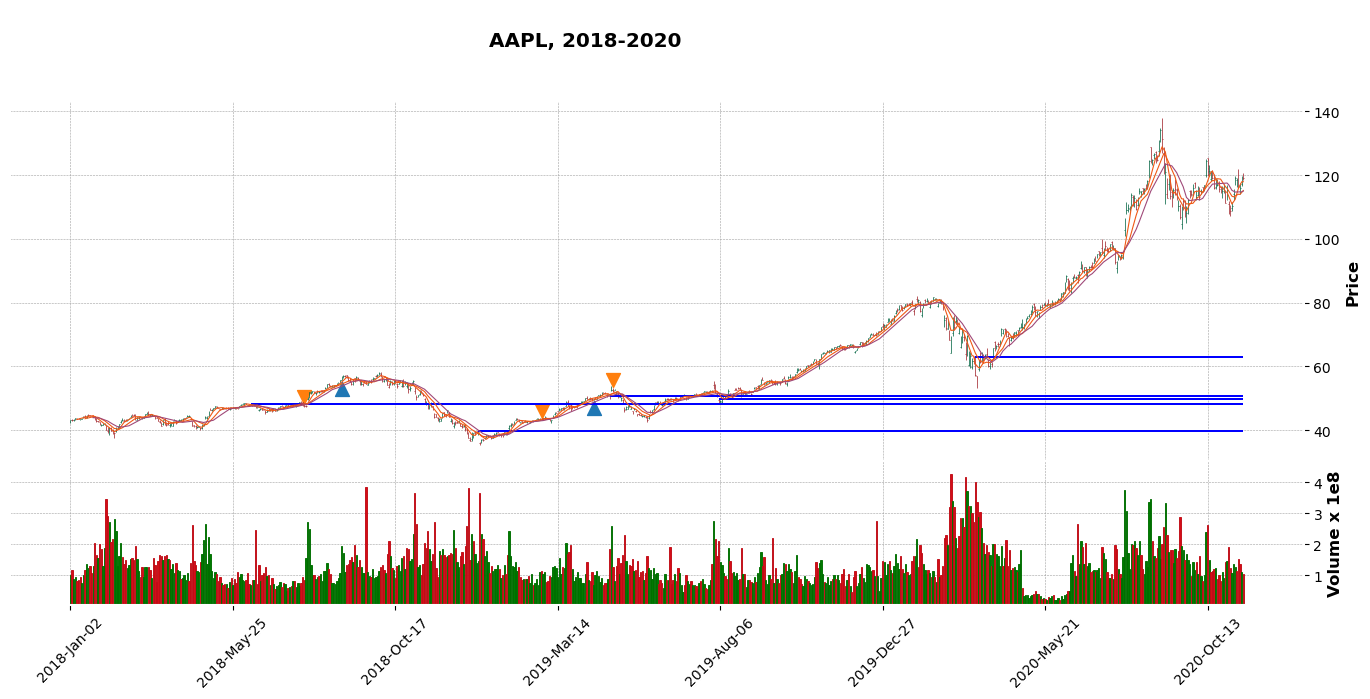

In [3]:
import numpy as np

data1=data.loc['2018-01-01':'2020-11-12']
#first we can find the critical points from some calculation
#There are 5 randomly choosen points
points=['2018-06-12','2019-01-02','2019-04-30','2019-08-05','2020-03-20']

seq_of_points=[
    [(i,data.loc[i,'High']),('2020-11-12',data.loc[i,'High'])] for i in points
] # or Lowest found, just change the argument 'High' to 'Low'

# suppose we have 3 critical upward break points and 2 downward break points represents high or low signal

points_break_up = ['2018-07-30','2019-02-28','2019-05-02'] #randomly choosen
points_break_down = ['2018-08-30','2019-04-15']

high_signal=[]
low_signal=[]
for i in [str(data1.index[j])[0:10] for j in range(len(data1))]:
    
    if i in points_break_up:
        high_signal.append(data1.loc[i,'High']*1.05)
    else: high_signal.append(np.nan)
    if i in points_break_down:
        low_signal.append(data1.loc[i,'Low']*0.95)
    else: low_signal.append(np.nan)
        


apds = [ 
         mpf.make_addplot(low_signal,type='scatter',markersize=100,marker='^'),
         mpf.make_addplot(high_signal,type='scatter',markersize=100,marker='v')
       ]


#mpf.plot(data1,style='charles',title='\nAAPL, 2018-2020',mav=(5,10,15),figratio=(25,10),figscale=1.25,
#        alines=dict(alines=seq_of_points,colors=['b' for i in range(len(seq_of_points))],linewidths=0.2),
#        addplot=apds,volume=True,savefig='AAPL_candle_line.jpg') 

# if needed, figure could be saved with codes above↑


mpf.plot(data1,style='charles',title='\nAAPL, 2018-2020',mav=(5,10,15),figratio=(25,10),figscale=1.25,
        alines=dict(alines=seq_of_points,colors=['b' for i in range(len(seq_of_points))],linewidths=0.2),
        addplot=apds,volume=True) 


In [4]:
data.sort_index()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-01-02   27.847500   27.860001   26.837500   27.332500   24.696352   
2015-01-05   27.072500   27.162500   26.352501   26.562500   24.000614   
2015-01-06   26.635000   26.857500   26.157499   26.565001   24.002876   
2015-01-07   26.799999   27.049999   26.674999   26.937500   24.339447   
2015-01-08   27.307501   28.037500   27.174999   27.972500   25.274624   
...                ...         ...         ...         ...         ...   
2020-11-06  118.320000  119.199997  116.129997  118.690002  118.690002   
2020-11-09  120.500000  121.989998  116.050003  116.320000  116.320000   
2020-11-10  115.550003  117.589996  114.129997  115.970001  115.970001   
2020-11-11  117.190002  119.629997  116.440002  119.489998  119.489998   
2020-11-12  119.620003  120.529999  118.570000  119.209999  119.209999   

               Volume  
Date                   
2015-01-02  212818400  
2015-01-05  257142000  
2015-01-06  263188400  
2015-01-07  160423600  
2015-01-08  237458000  
...               ...  
2020-11-06  114457900  
2020-11-09  154515300  
2020-11-10  138023400  
2020-11-11  112295000  
2020-11-12  103162300  

[1478 rows x 6 columns]

## Identify the critical points

In [1]:
import datetime 

def merge_close_point(l,k,n_std):
    unadjusted_points=l.sort_values(by=l.columns[0])
    adjusted_points=[]#需要被调整的集合
    close_points=pd.DataFrame() #需要被调整的集合内的点
    for i in range(len(unadjusted_points)-1):
        n=0
        for j in range(i+1,len(unadjusted_points)):
            if unadjusted_points.iloc[j,0]-unadjusted_points.iloc[i,0]<k:
                close_points=close_points.append(unadjusted_points.iloc[[i]],ignore_index=False)
                close_points=close_points.append(unadjusted_points.iloc[[j]],ignore_index=False)
                if n==0:
                    adjusted_points.append(pd.DataFrame())
                    adjusted_points[-1]=adjusted_points[-1].append(unadjusted_points.iloc[[i]],ignore_index=False)
                adjusted_points[-1]=adjusted_points[-1].append(unadjusted_points.iloc[[j]],ignore_index=False)
                n+=1  
#     adjusted_points删除子集
    for i in range(len(adjusted_points)-1):
        for j in range(i+1,len(adjusted_points)):
            try:
                if set(adjusted_points[j].iloc[:,0])<set(adjusted_points[i].iloc[:,0]):
                    adjusted_points.remove(adjusted_points[j])
                if set(adjusted_points[i].iloc[:,0])<set(adjusted_points[j].iloc[:,0]):
                    adjusted_points.remove(adjusted_points[i])
            except:
                pass
    
    unadjusted_points = unadjusted_points.append(close_points)
    unadjusted_points = unadjusted_points.append(close_points)
    new_points = unadjusted_points.drop_duplicates(keep=False)
    
    for i in adjusted_points:
        std=i.iloc[:,0].std()
        mean=i.iloc[:,0].mean()
        condition=((i[i.columns[0]]<mean+n_std*std)&(i[i.columns[0]]>mean-n_std*std))
        j=i[condition]
        k=i[~condition]
        j=j.sort_index()
        if len(j)>0:
            new_points=pd.concat([new_points,k],axis=0)
            new_points.loc[j.index[0]]=[j.iloc[:,0].mean(),j.iloc[:,1].sum()]
    new_points = new_points.drop_duplicates(keep="first")
    
    return new_points

def iterate_merge(l,k,n_std):
    record=[l,merge_close_point(l,k,n_std)]
    while len(record[-1])!=len(record[-2]):
#         print(1)
        record.append(merge_close_point(record[-1],k,n_std))
    return record[-1].sort_index()

def line_merge(l):

In [6]:
import pandas as pd
import warnings
import datetime
warnings.filterwarnings('ignore')
def local_high_and_low(data,time_horizon):
    data['maxH']=data['High'].rolling(window=time_horizon,center=True).max()
    data['minL']=data['Low'].rolling(window=time_horizon,center=True).min()
    data['meanH']=data['High'].rolling(window=time_horizon,center=True).mean()
    data['meanL']=data['Low'].rolling(window=time_horizon,center=True).mean()
    data['stdH']=data['High'].rolling(window=time_horizon,center=True).std()
    data['stdL']=data['Low'].rolling(window=time_horizon,center=True).std()
    return data

def identify(data,days=10):
    pointsH=[]
    pointsL=[]
    j = data.index[0]
    for i in data.index:
        
        if data['High'][i]==data['maxH'][i] or data['High'][i]-data['stdH'][i]>data['meanH'][i]:
            if (i-j).days > days:
                pointsH.append(str(i)[0:10])
                j=i
        if data['Low'][i]==data['minL'][i] or data['Low'][i]+data['stdL'][i]<data['meanL'][i]:
            if (i-j).days > days:
                pointsL.append(str(i)[0:10])
                j=i
            
        
    return pointsH,pointsL

def critical_points(data,points,touching_times,craziness,period_max,types='High'):

    selected = pd.DataFrame(columns=('how', 'crazy'))
    for i in range(len(points.index)-1):

        if types=='High':
            period=(points.index[i+1]-points.index[i]).days
            crazy_point= data['Close'].rolling(window=int(period*5/7)).max()[points.index[i+1]]
            
            if points['n'][i]>=touching_times:
                selected=selected.append(pd.Series({'how':'touch_limit',
                                'crazy':crazy_point}, name=points.index[i]))  
            if period>period_max:
                selected=selected.append(pd.Series({'how':'period_limit',
                                'crazy':crazy_point}, name=points.index[i])) 
            if crazy_point / points['High'][i] > 1+craziness:
                selected=selected.append(pd.Series({'how':'crazy_limit',
                                'crazy':crazy_point}, name=points.index[i])) 
                
        if types=='Low':
            period=(points.index[i+1]-points.index[i]).days
            crazy_point= data['Close'].rolling(window=int(period*5/7)).min()[points.index[i+1]]
            
            if points['n'][i]>=touching_times:
                selected=selected.append(pd.Series({'how':'touch_limit',
                                'crazy':crazy_point}, name=points.index[i]))   
            if period>period_max:
                selected=selected.append(pd.Series({'how':'period_limit',
                                'crazy':crazy_point}, name=points.index[i]))  
            elif crazy_point / points['Low'][i] < 1-craziness:
                selected=selected.append(pd.Series({'how':'crazy_limit',
                                'crazy':crazy_point}, name=points.index[i]))   
    
    df1= pd.merge(points,selected,left_index=True, right_index=True,how='inner')
    
    
    return df1
            

def identify_and_merge(stock_code,time_horizon=50,touching_times=2,craziness=0.2,merging_nstd=2,period_max=50,
                      start='2015-01-01',end='2020-11-13',merge_range=3):
    
    data1=local_high_and_low(data,time_horizon)
    pointsH, pointsL = identify(data1)
    df1=pd.DataFrame(data1.loc[:,'High'][pointsH])
    df1['n']=1

    merged_points1=iterate_merge(df1,merge_range,merging_nstd)
    merged_points1=critical_points(data,merged_points1,touching_times,craziness,period_max,types='High')
    
    
    
    df2=pd.DataFrame(data1.loc[:,'Low'][pointsL])
    df2['n']=1

    merged_points2=iterate_merge(df2,merge_range,merging_nstd)
    merged_points2=critical_points(data,merged_points2,touching_times,craziness,period_max,types='Low') 
    
    seq_of_points1=[
         [(str(merged_points1.iloc[i,:].name)[:10],merged_points1.iloc[i,0]),
          (str(min(max(data1.index),merged_points1.iloc[i,:].name+datetime.timedelta(days=3*365)))[:10],merged_points1.iloc[i,0])] 
        for i in range(len(merged_points1))
    ]
    seq_of_points2=[
         [(str(merged_points2.iloc[i,:].name)[:10],merged_points2.iloc[i,0]),
          (str(min(max(data1.index),merged_points2.iloc[i,:].name+datetime.timedelta(days=3*365)))[:10],merged_points2.iloc[i,0])] 
        
        for i in range(len(merged_points2))
    ]
    seq_of_points=seq_of_points1+seq_of_points2
    
    peak=[]
    troughs=[]
    

    for i in [str(data1.index[j])[0:10] for j in range(len(data1))]:    
        if i in pointsH:
            peak.append(data1.loc[i,'High']*1.1)
        else: peak.append(np.nan)
        if i in pointsL:
            troughs.append(data1.loc[i,'Low']*0.9)
        else: troughs.append(np.nan)

    apds = [ 
             mpf.make_addplot(troughs,type='scatter',markersize=100,marker='^'),
             mpf.make_addplot(peak,type='scatter',markersize=100,marker='v')
           ]
    mpf.plot(data1,style='charles',title='\n%s'%stock_code,mav=(5,10,15),figratio=(25,10),figscale=1.25,
            alines=dict(alines=seq_of_points,colors=['b' for i in range(len(seq_of_points))],linewidths=0.2),
            addplot=apds,volume=False) 
    return merged_points2,merged_points1    
    
    

[*********************100%***********************]  1 of 1 completed


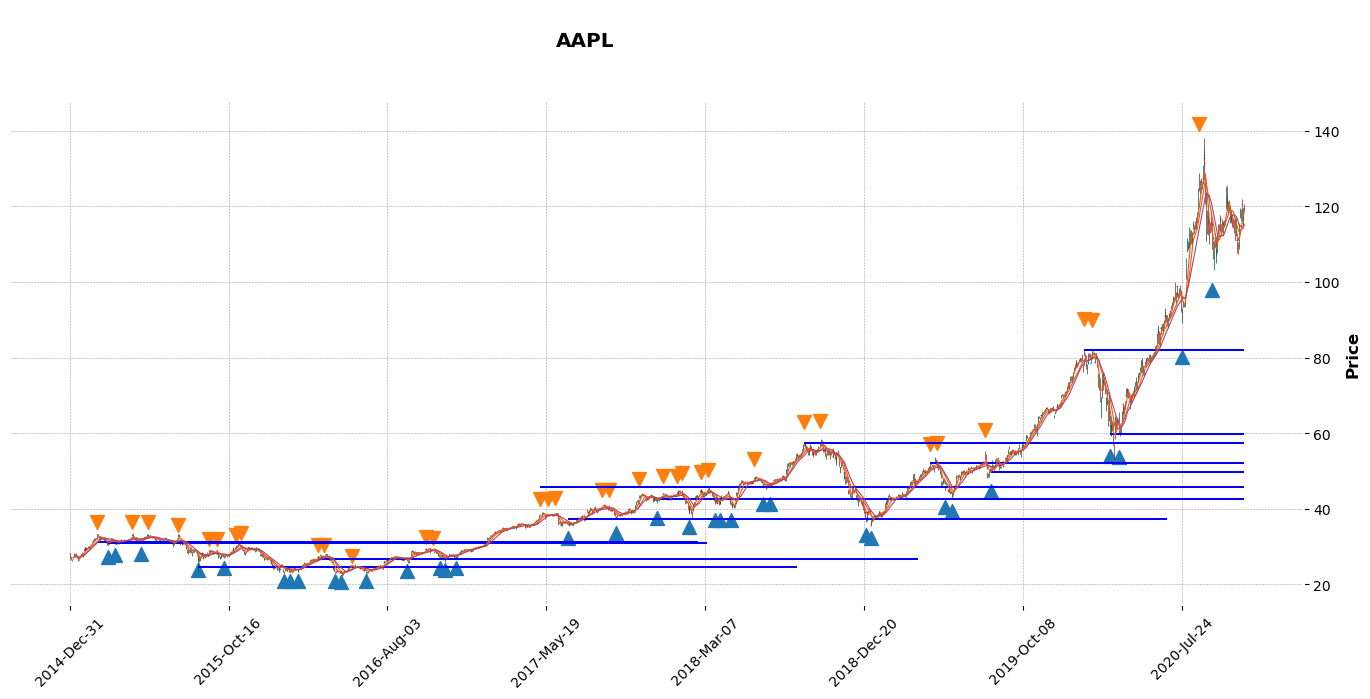

(                  Low     n           how      crazy
 2015-03-12  30.922083   5.0   touch_limit  26.440001
 2015-03-12  30.922083   5.0  period_limit  26.440001
 2015-08-21  24.705854  24.0   touch_limit  22.584999
 2015-08-21  24.705854  24.0  period_limit  22.584999
 2017-06-28  37.282188   6.0   touch_limit  35.682499
 2017-06-28  37.282188   6.0  period_limit  35.682499
 2017-12-06  42.681252   2.0  period_limit  38.787498
 2018-06-19  45.858749   2.0  period_limit  35.547501
 2019-08-12  49.787498   1.0  period_limit  48.334999
 2020-03-16  59.891251   2.0  period_limit  56.092499,
                  High         n           how       crazy
 2015-02-23  31.269312      13.0   touch_limit   33.250000
 2015-02-23  31.269312      13.0  period_limit   33.250000
 2016-03-30  26.785833       3.0   touch_limit   38.497501
 2016-03-30  26.785833       3.0  period_limit   38.497501
 2016-03-30  26.785833       3.0   crazy_limit   38.497501
 2017-05-09  45.855507  128970.0   touch_limit   56

In [7]:
data=get_data('AAPL',start='2015-01-01',end='2020-11-13')
identify_and_merge('AAPL',time_horizon=50,touching_times=3,craziness=0.3,merging_nstd=2,period_max=100)

[*********************100%***********************]  1 of 1 completed


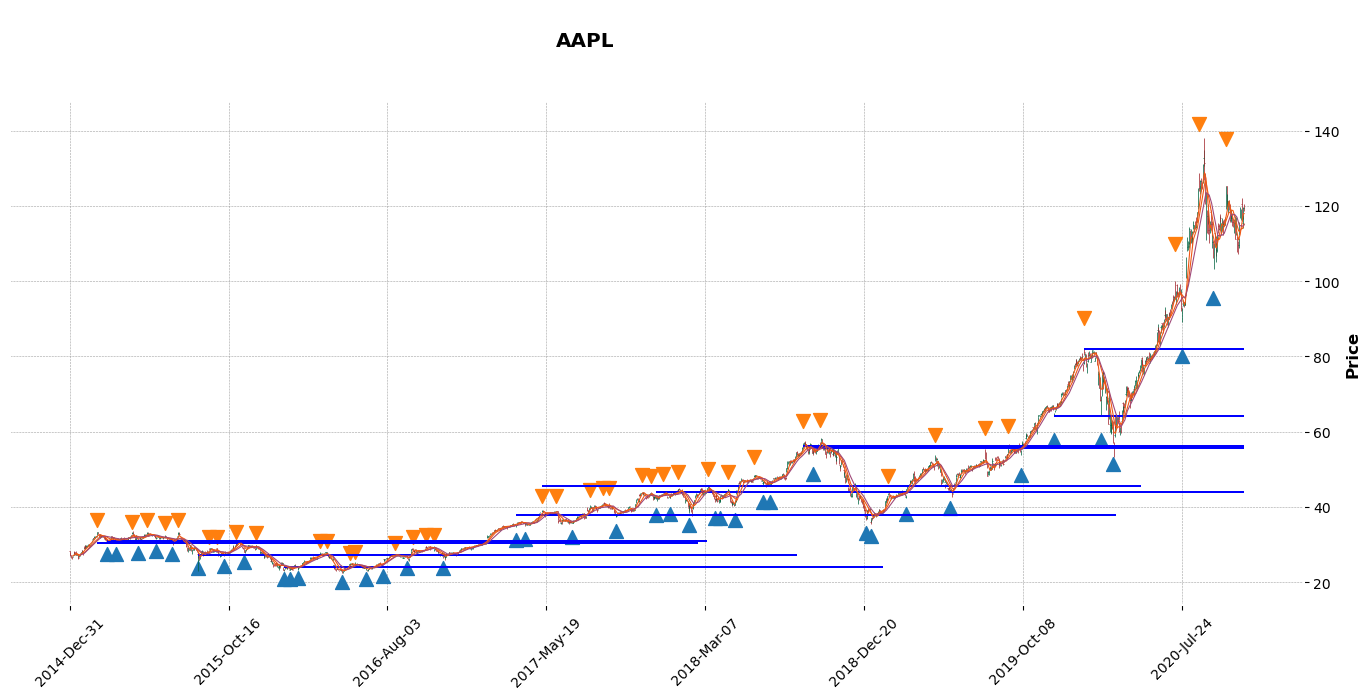

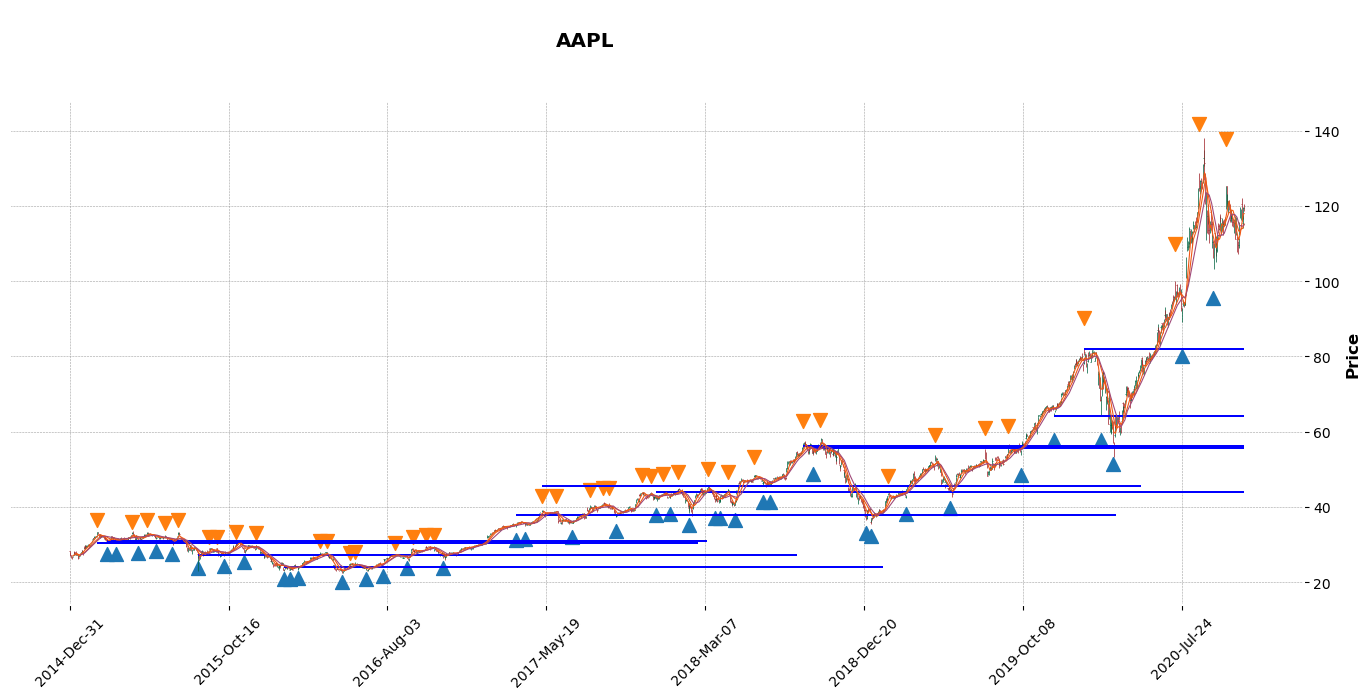

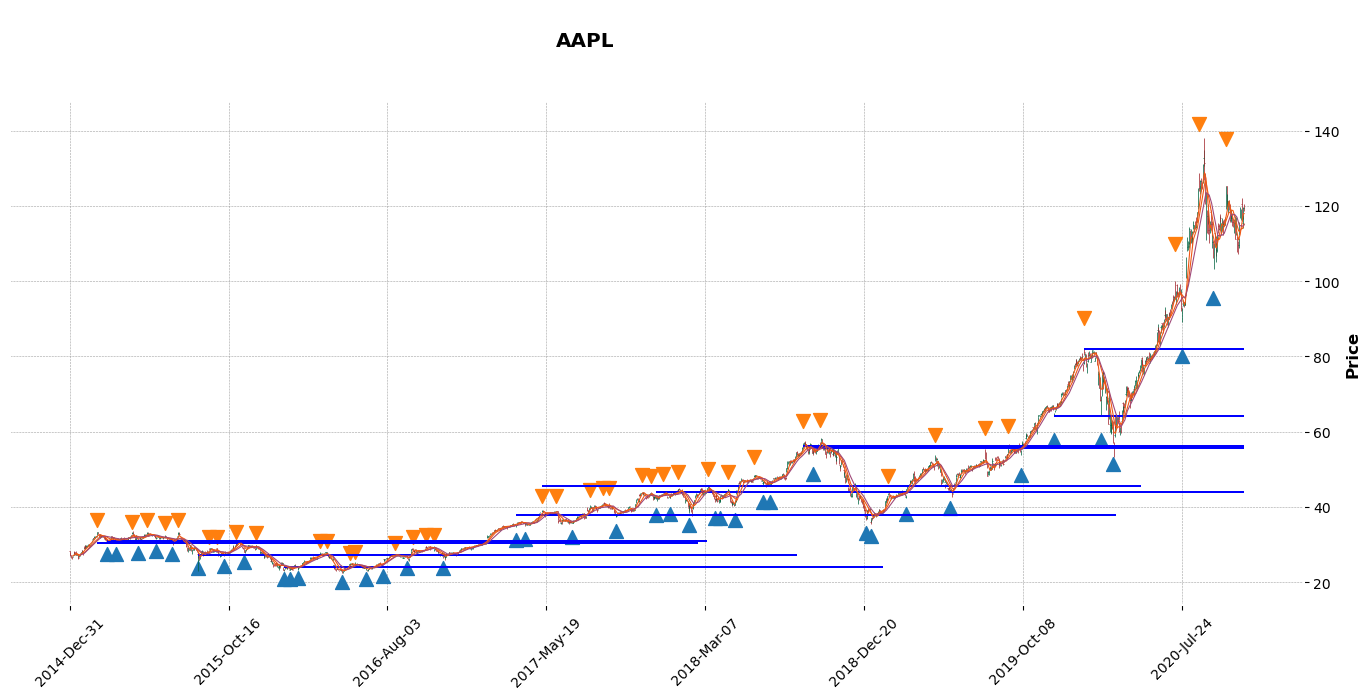

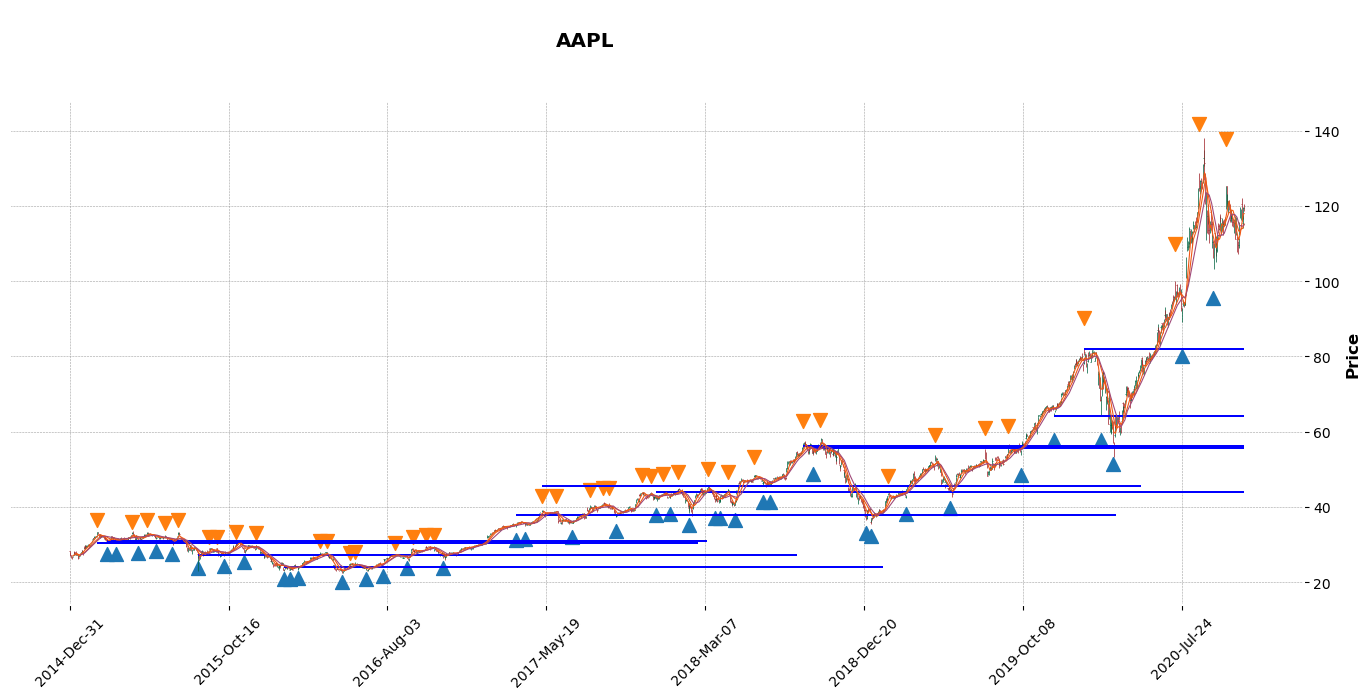

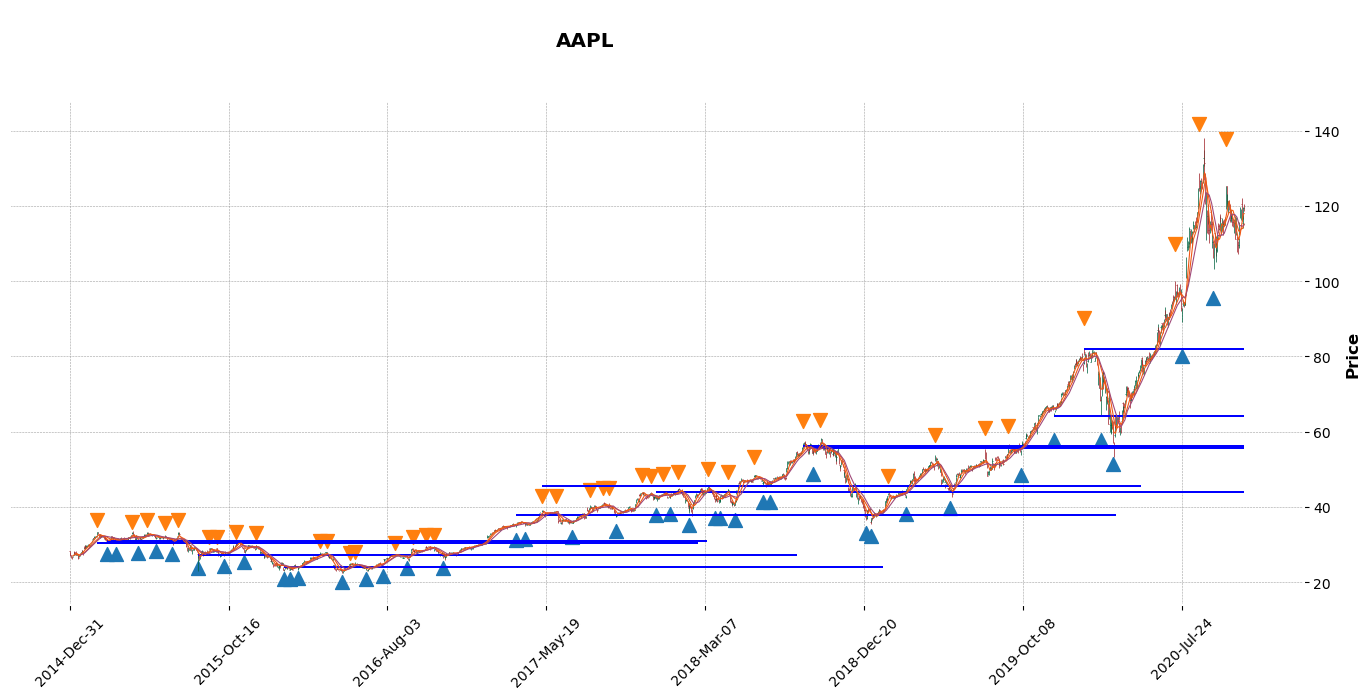

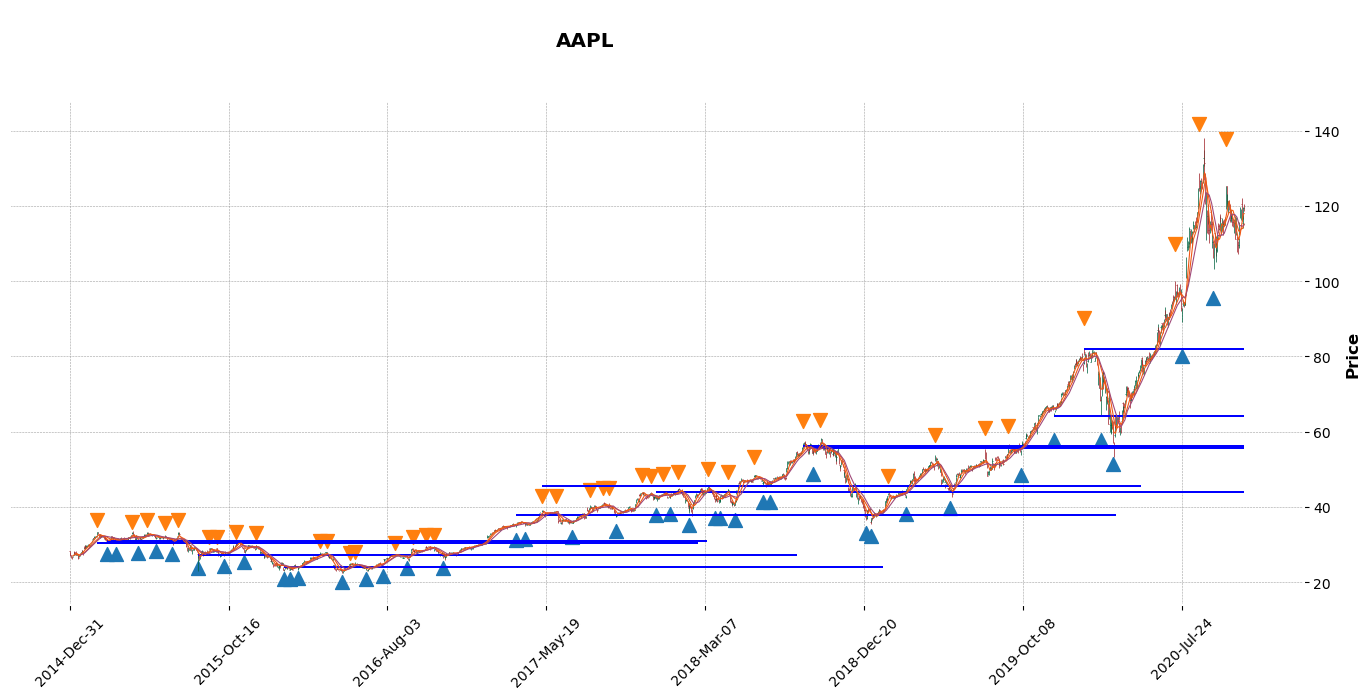

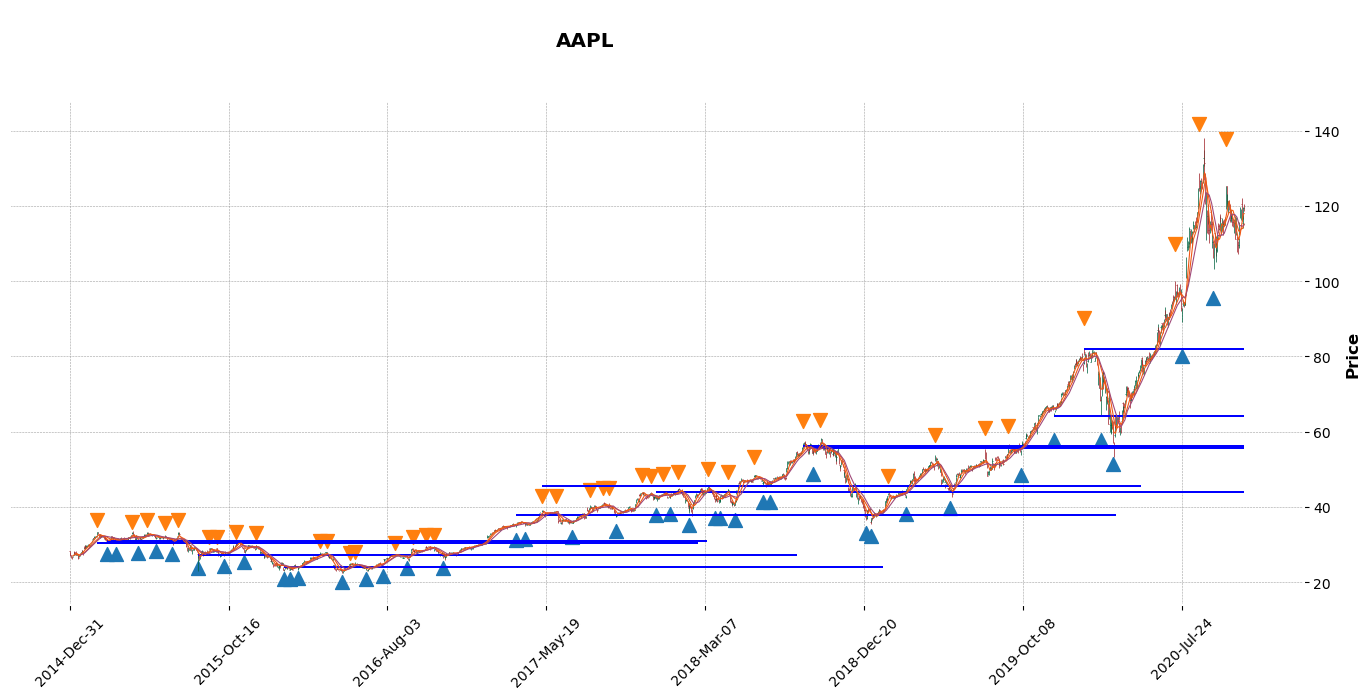

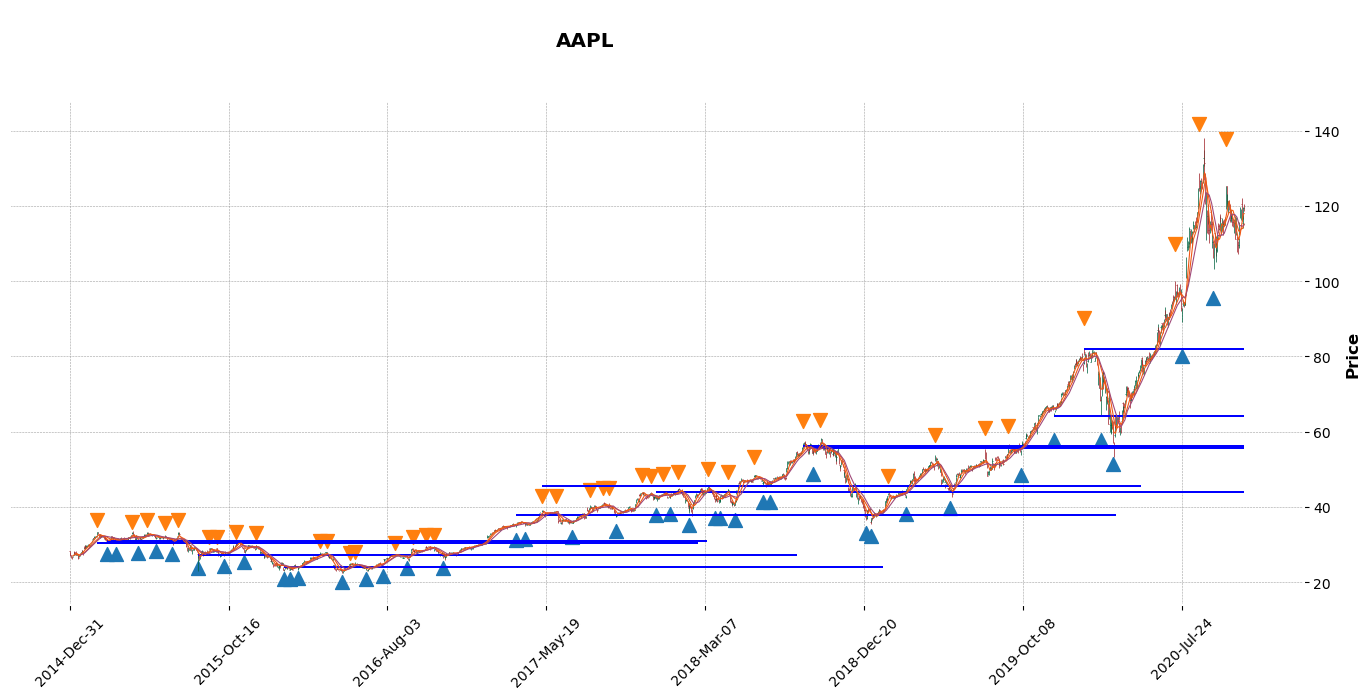

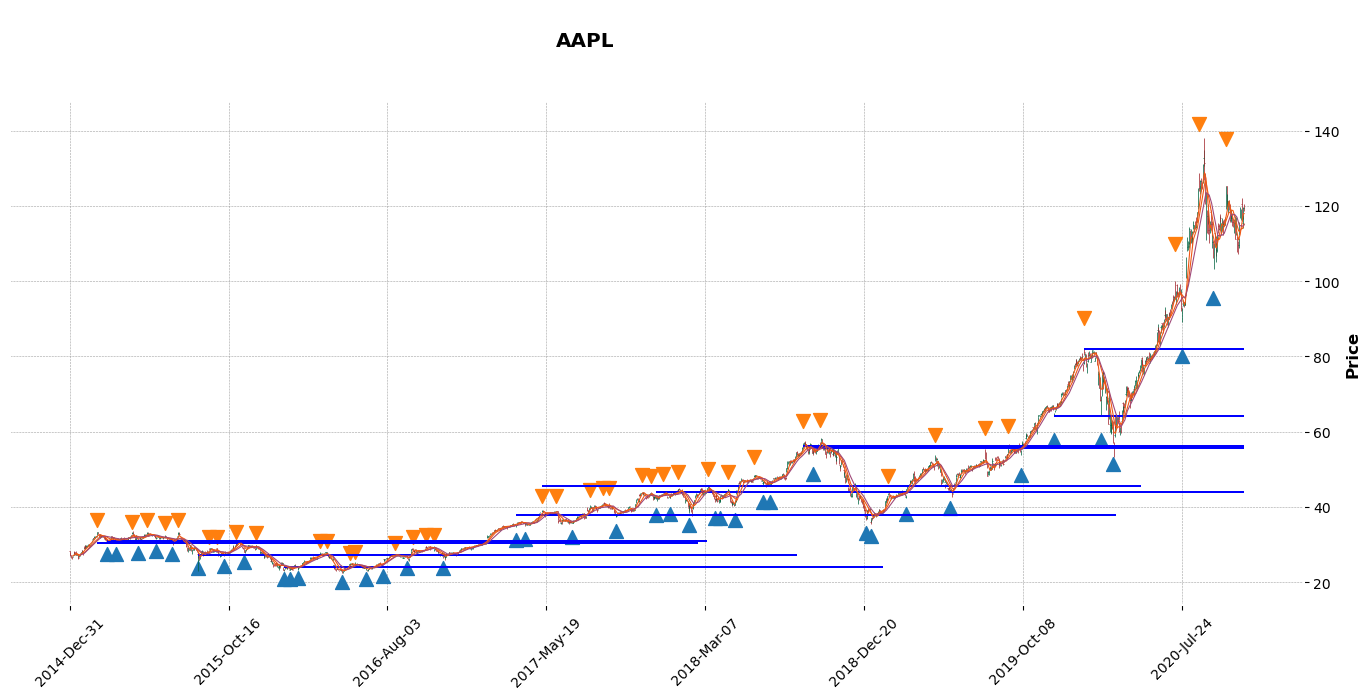

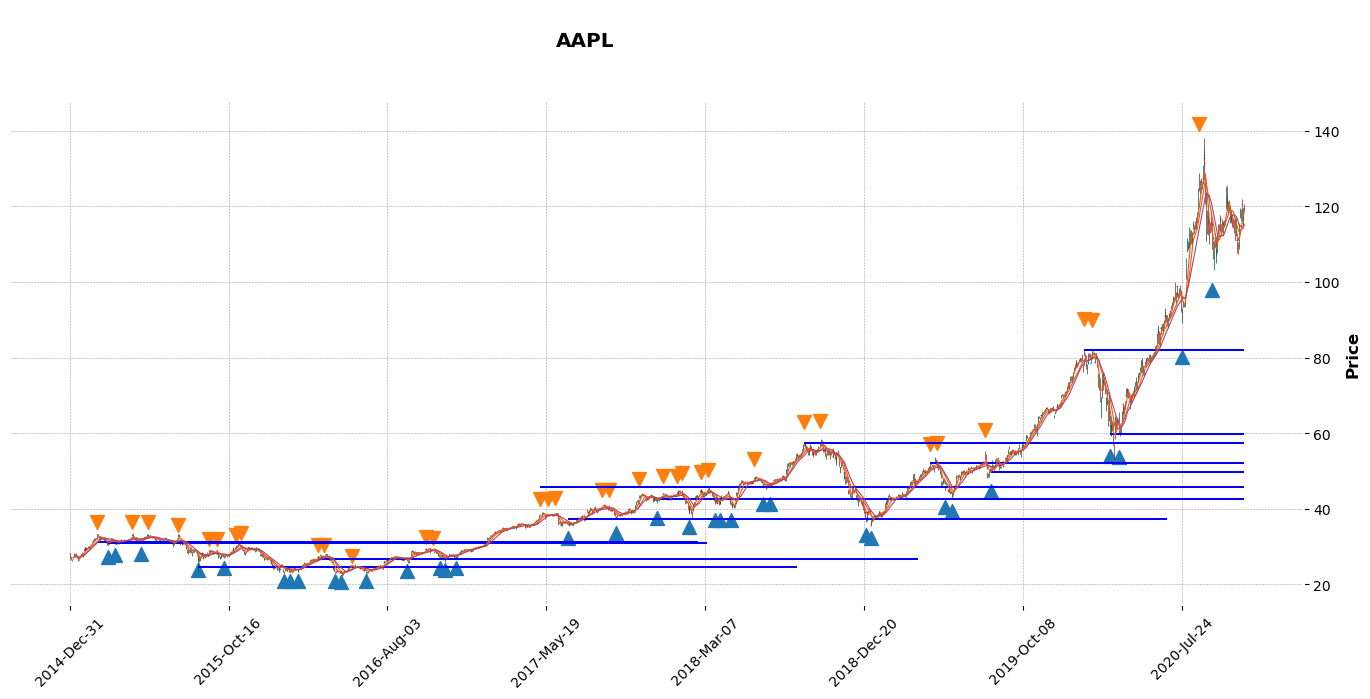

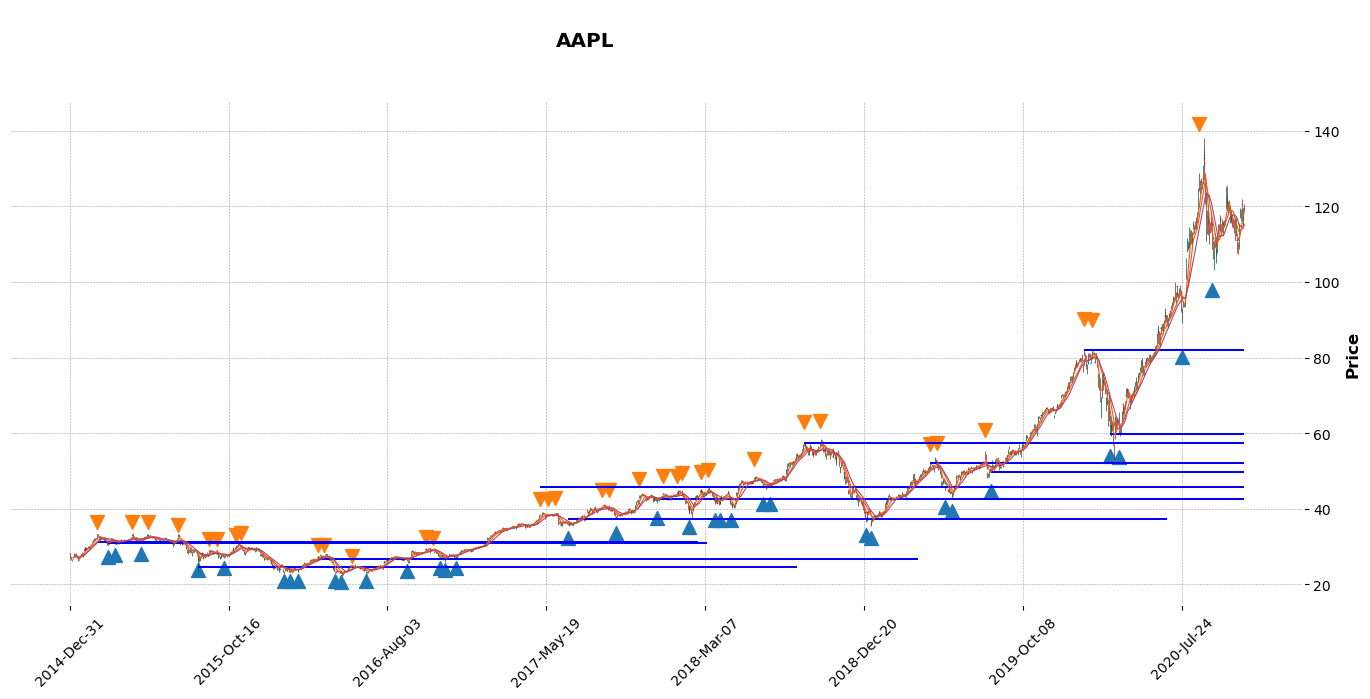

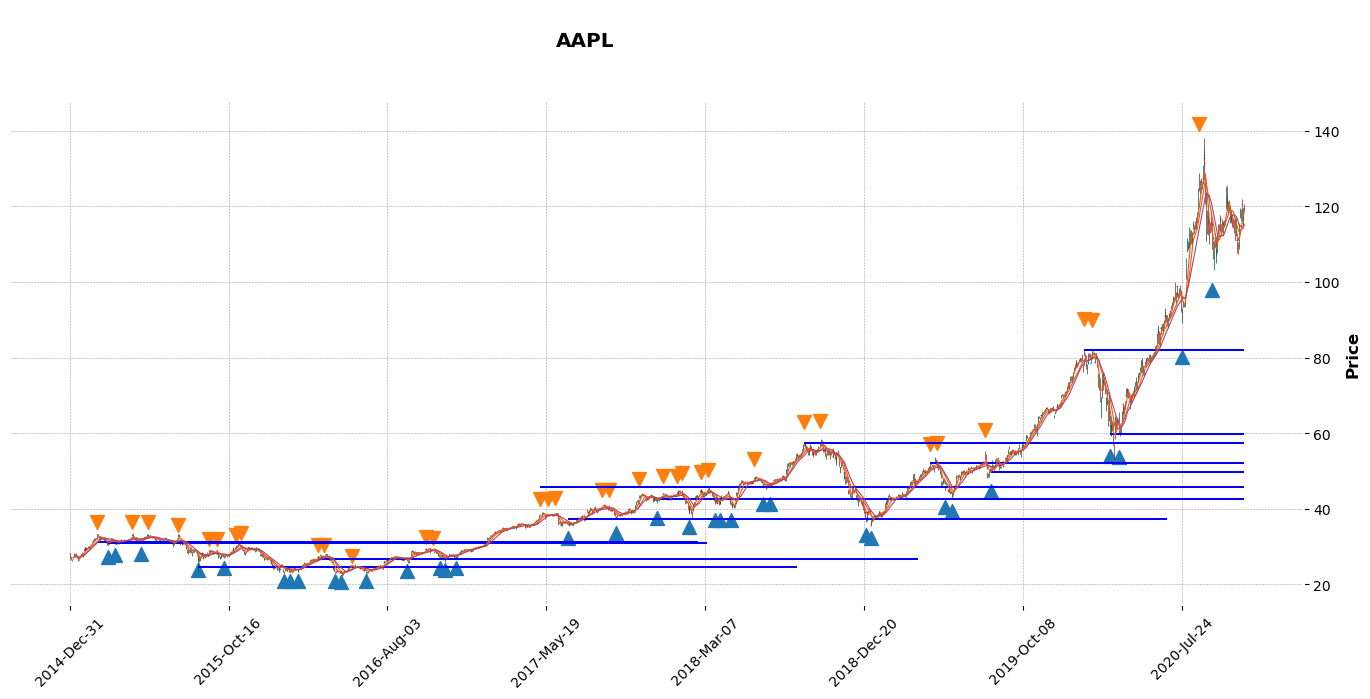

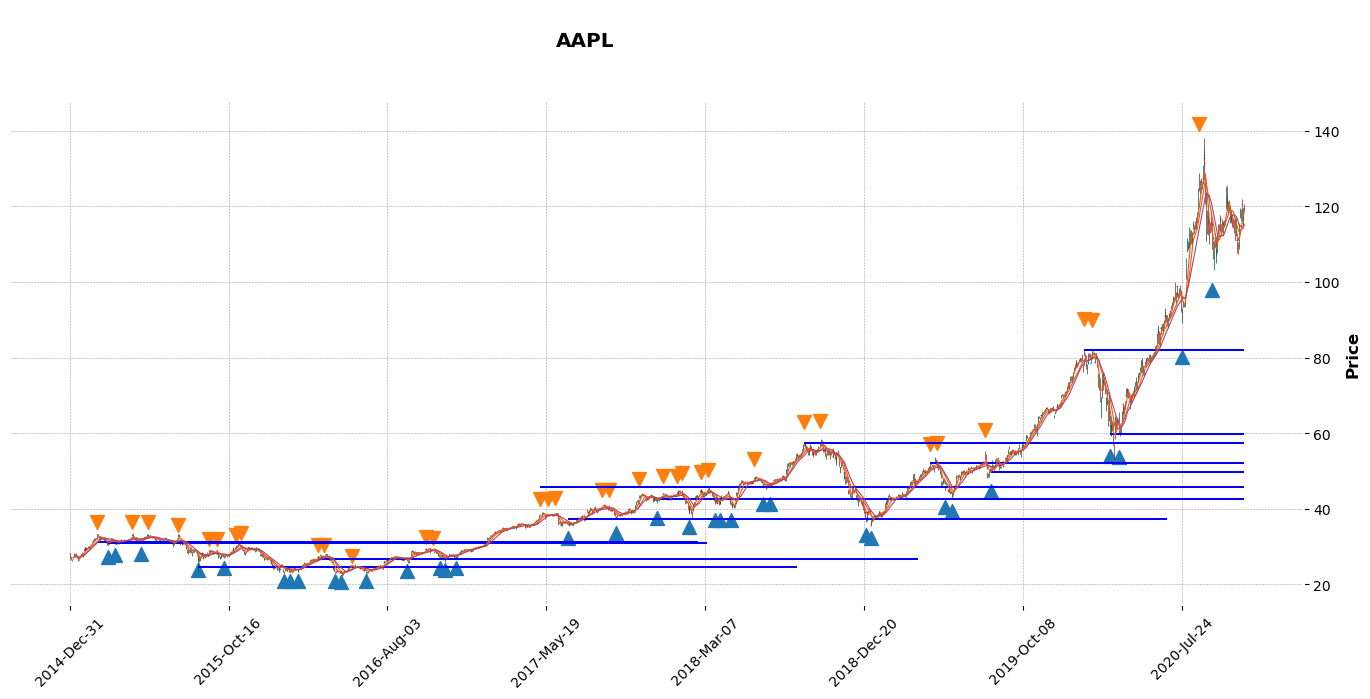

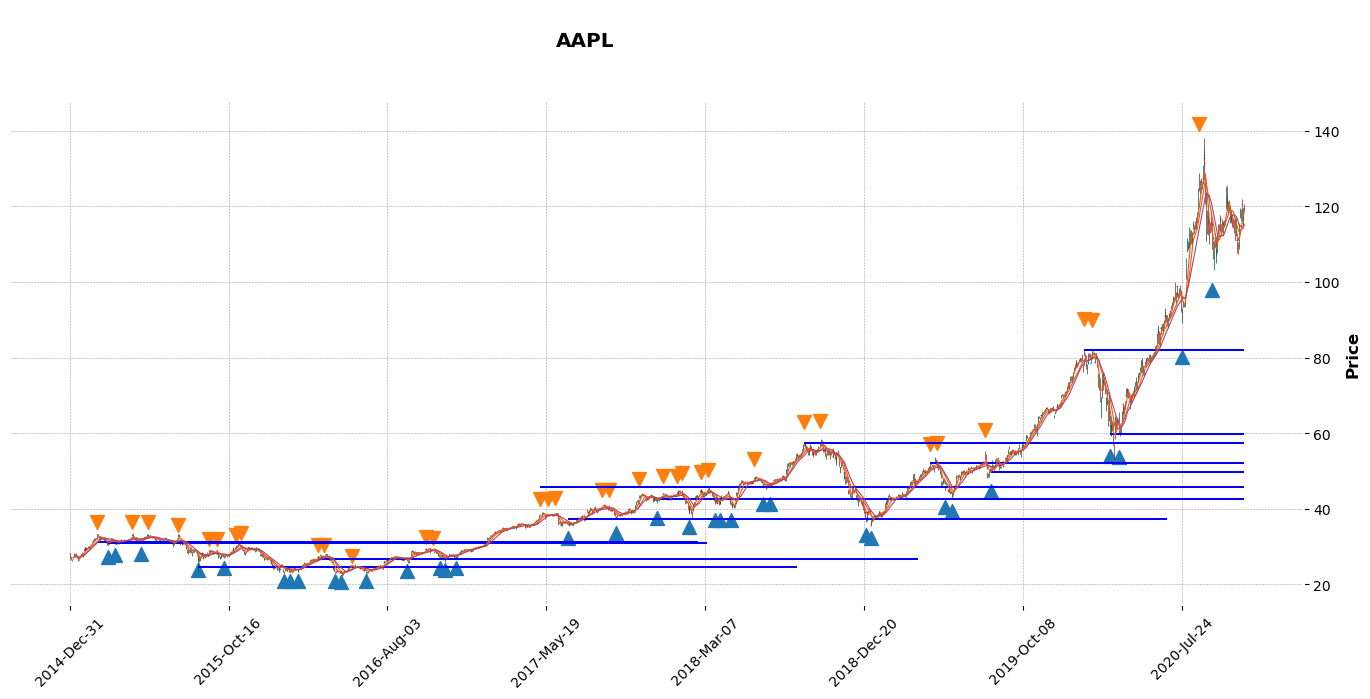

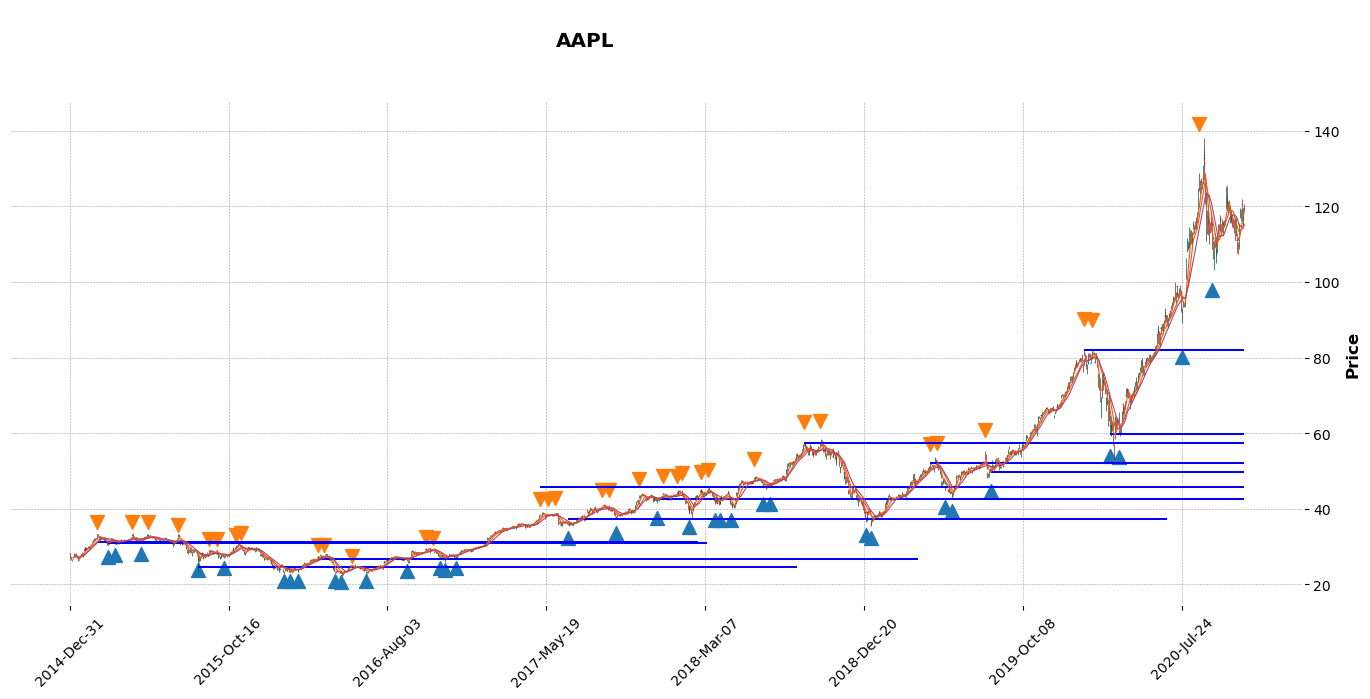

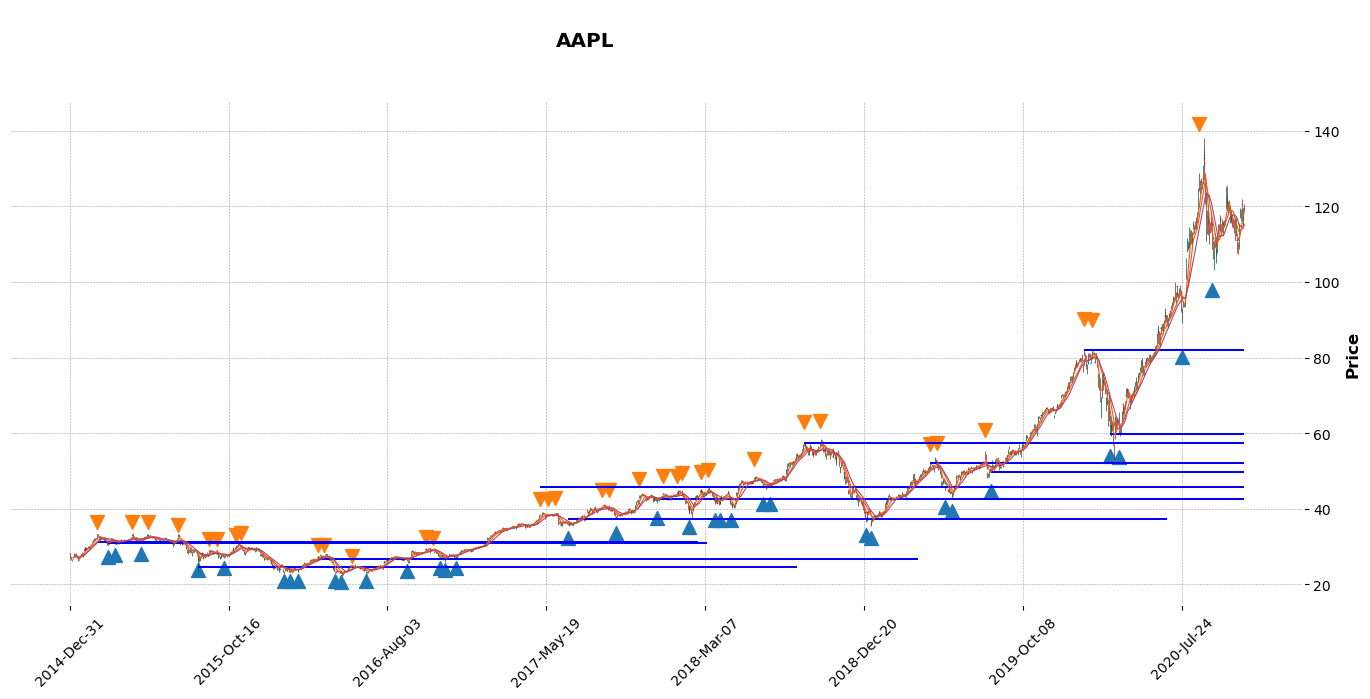

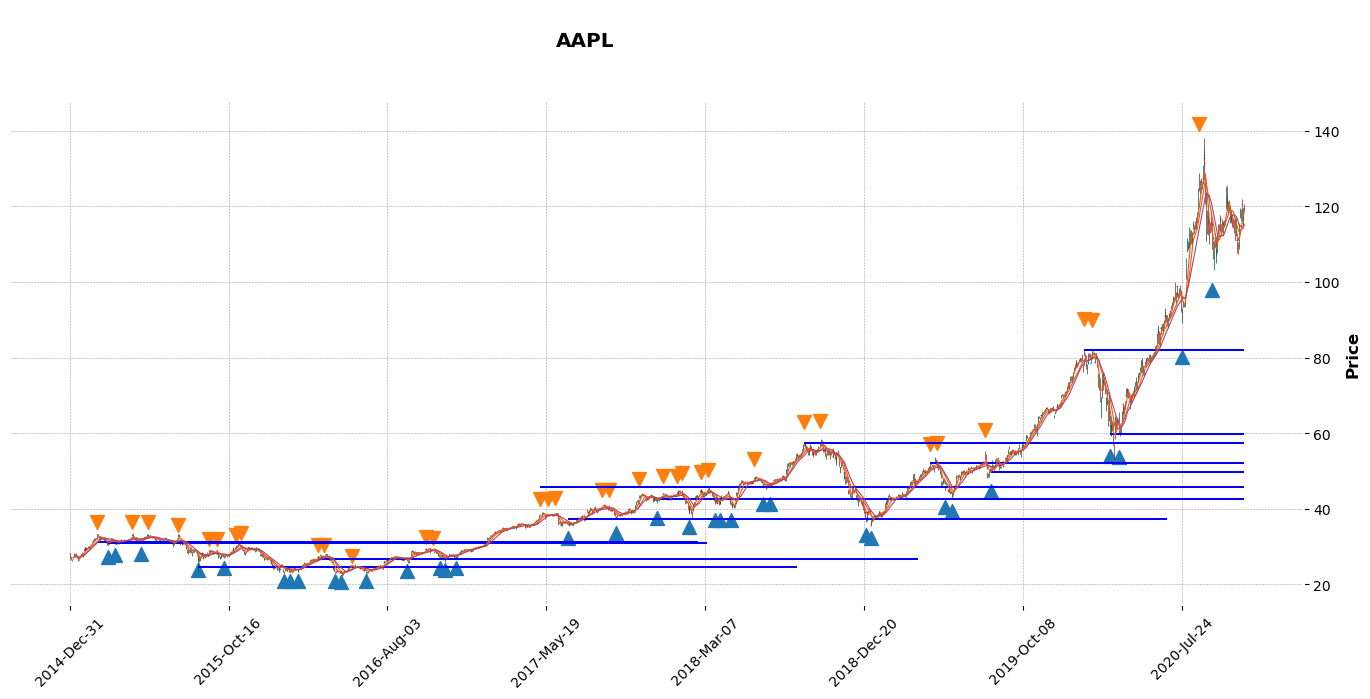

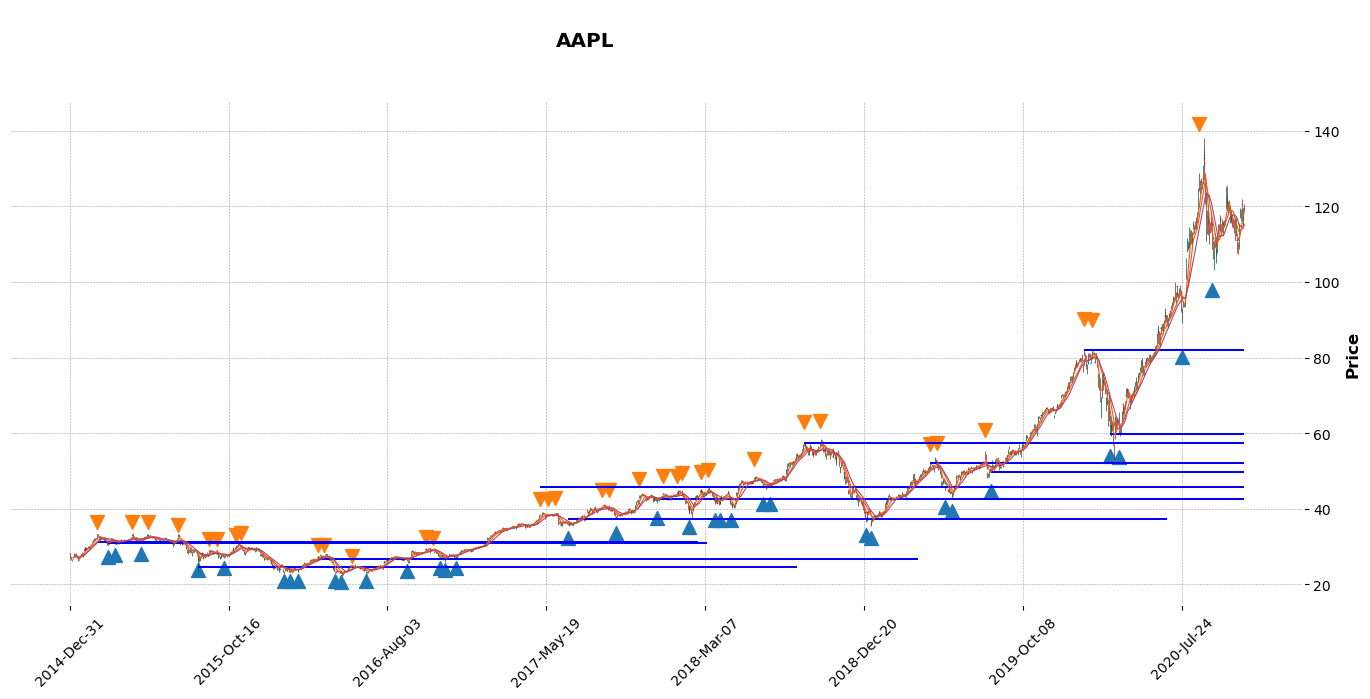

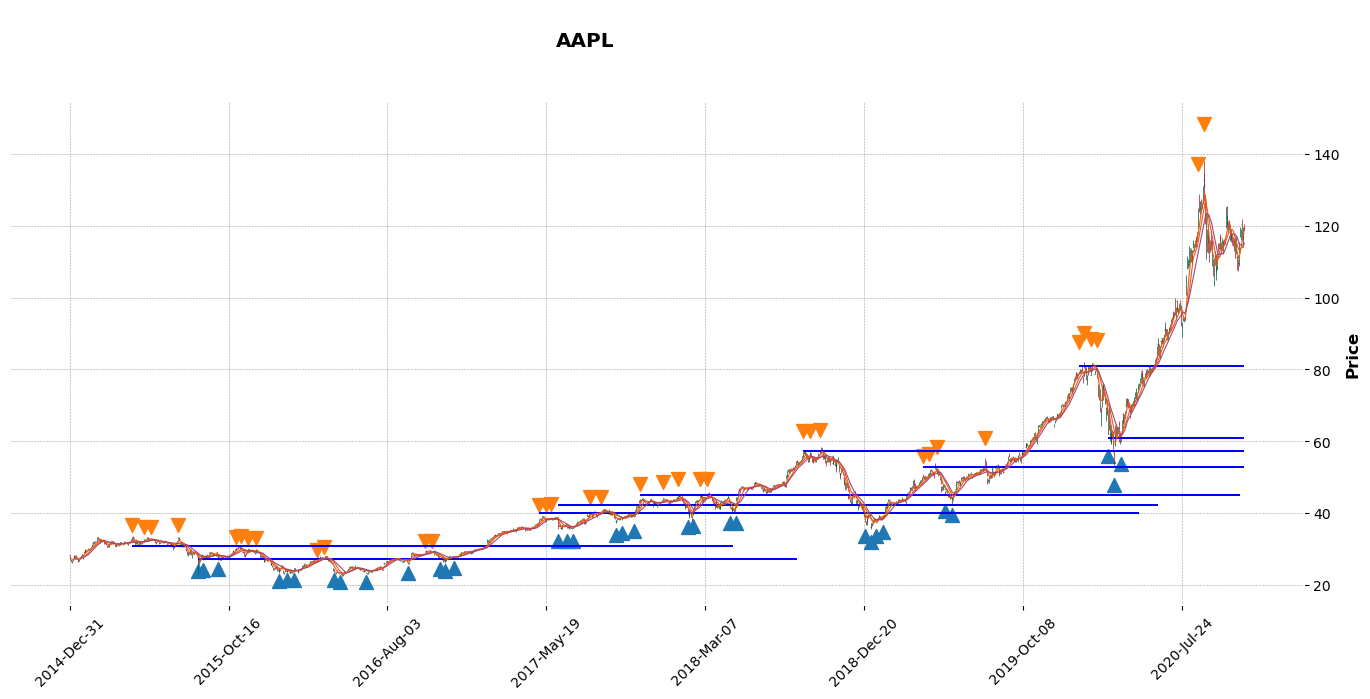

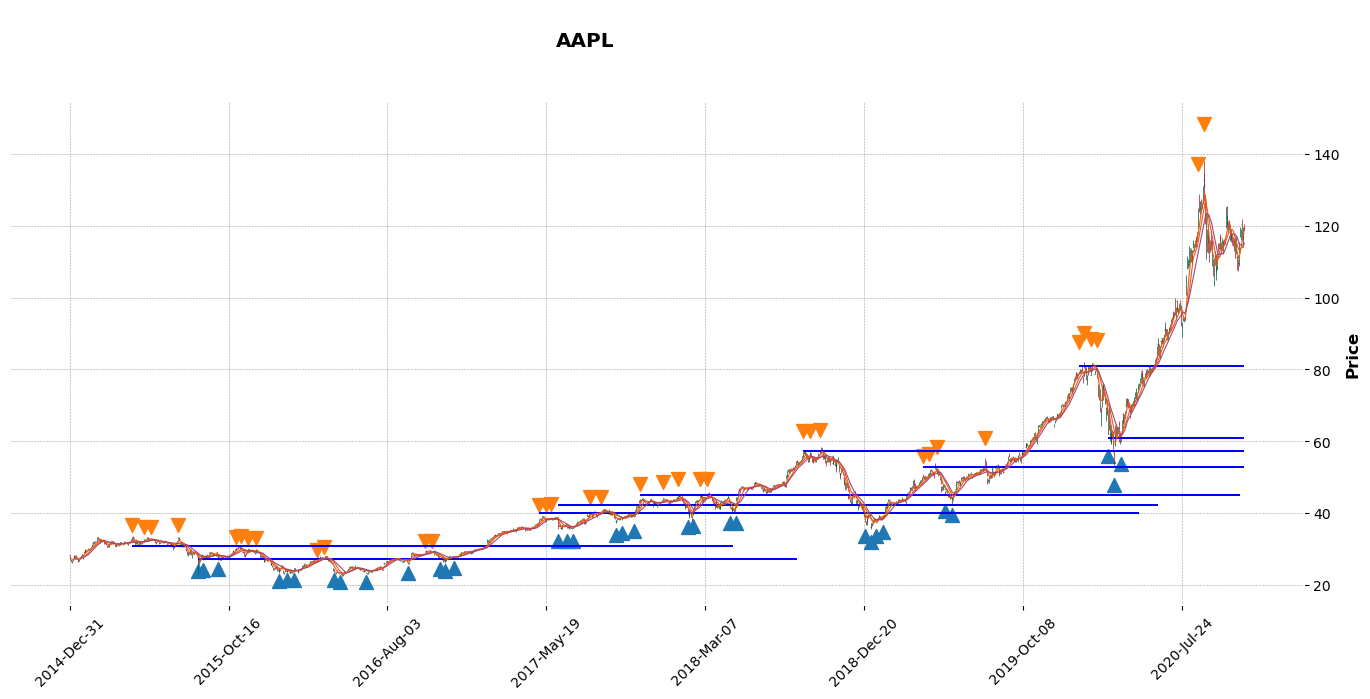

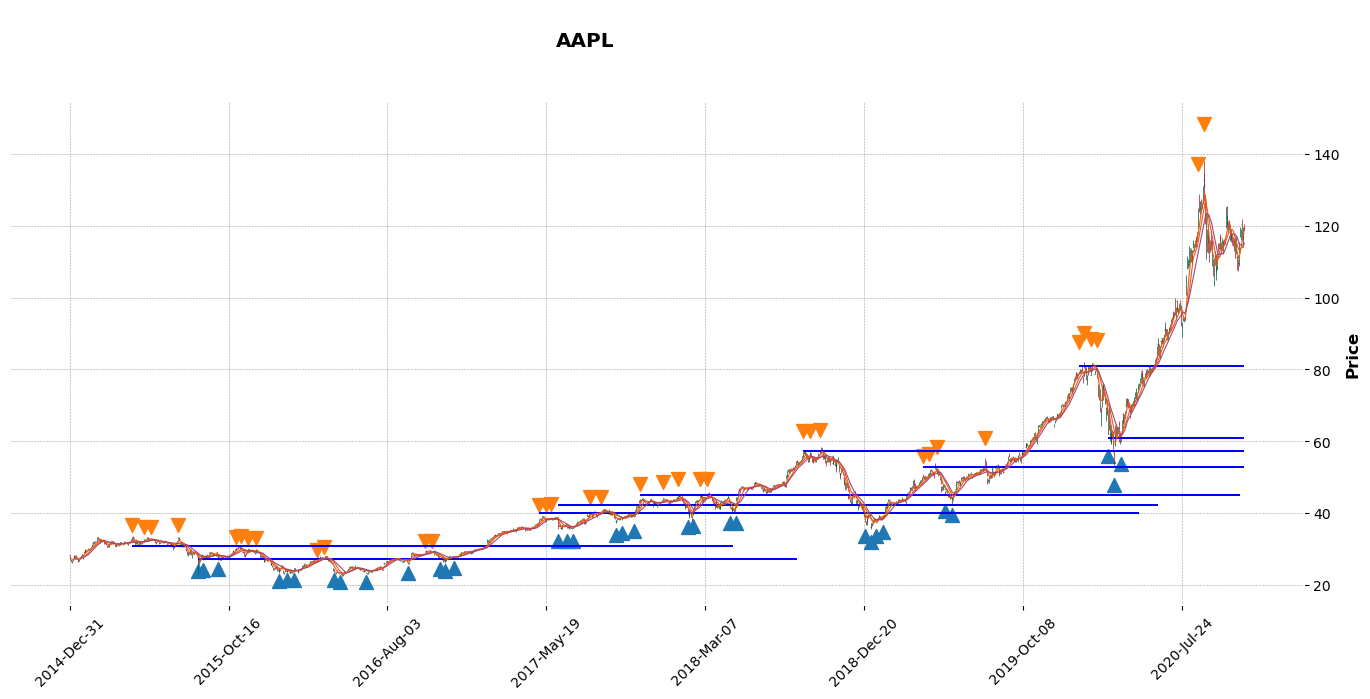

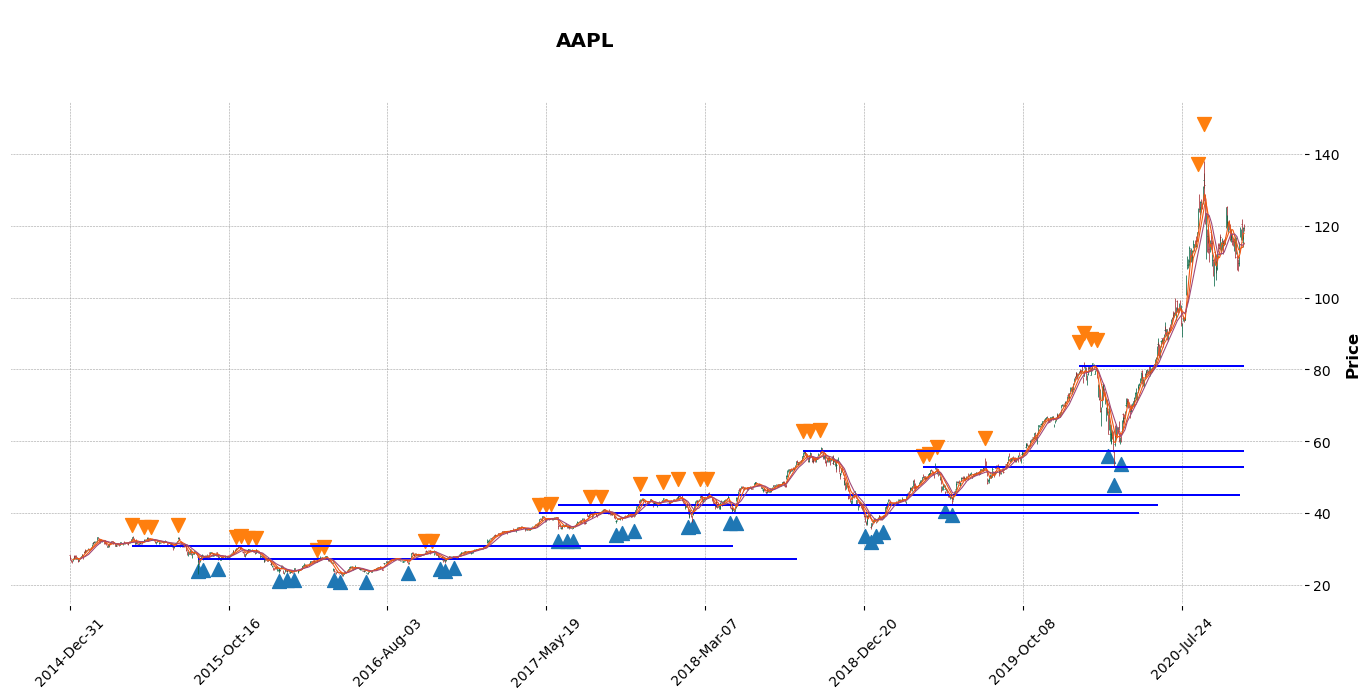

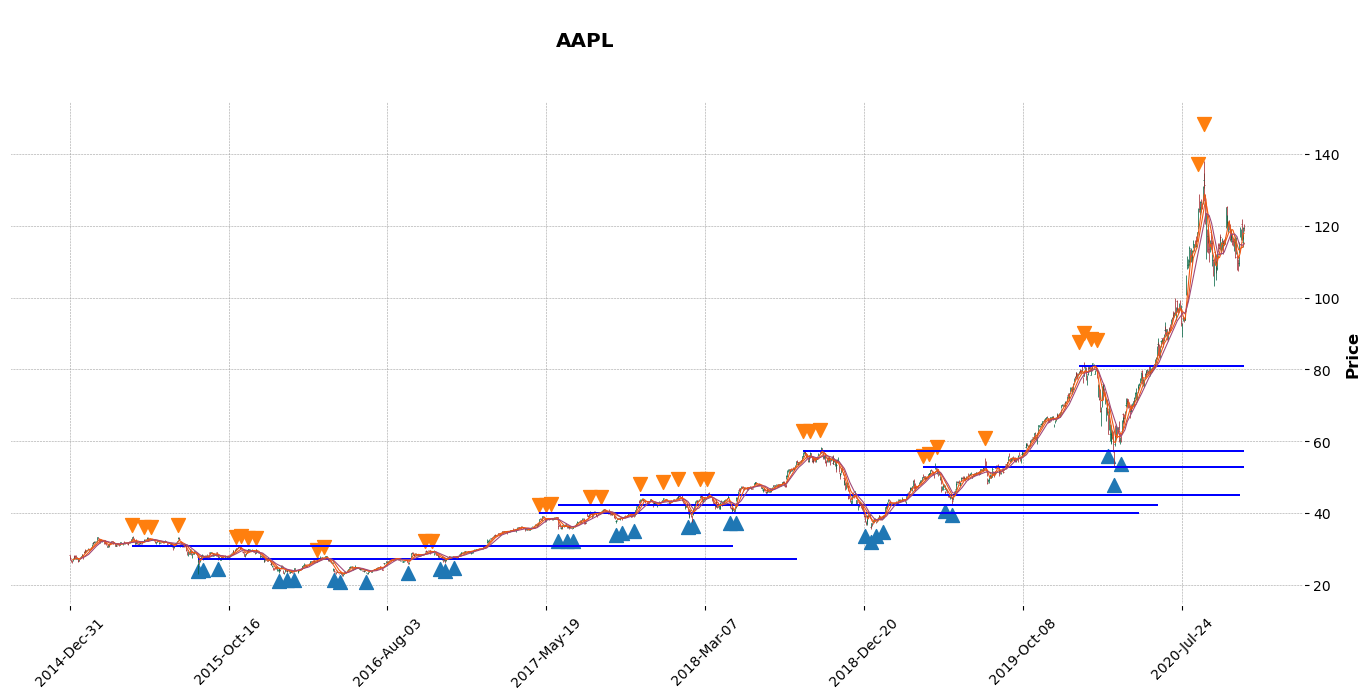

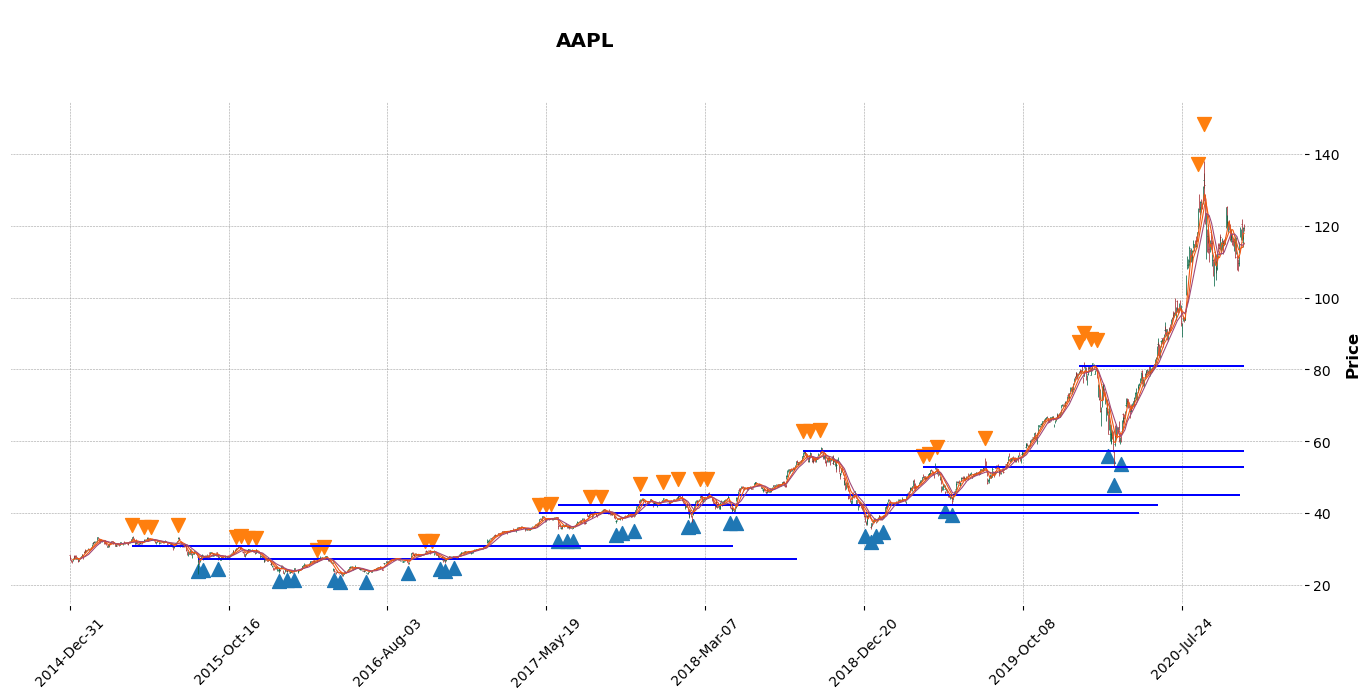

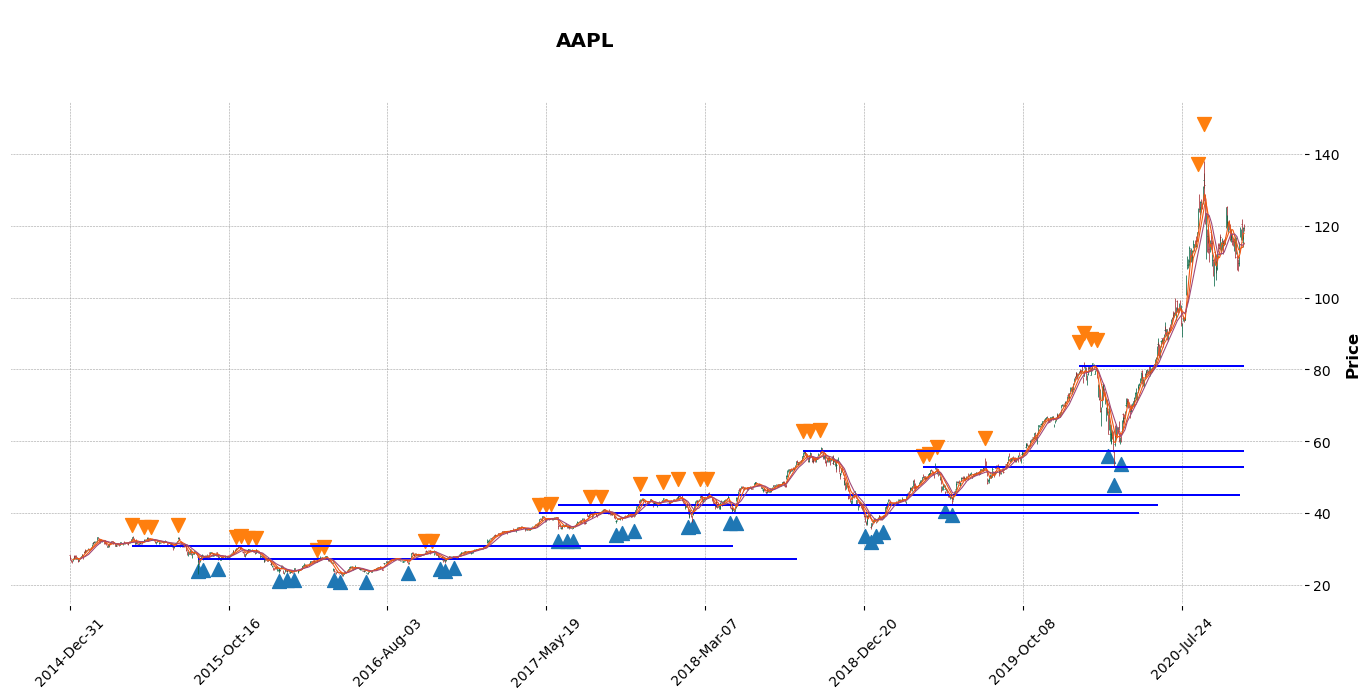

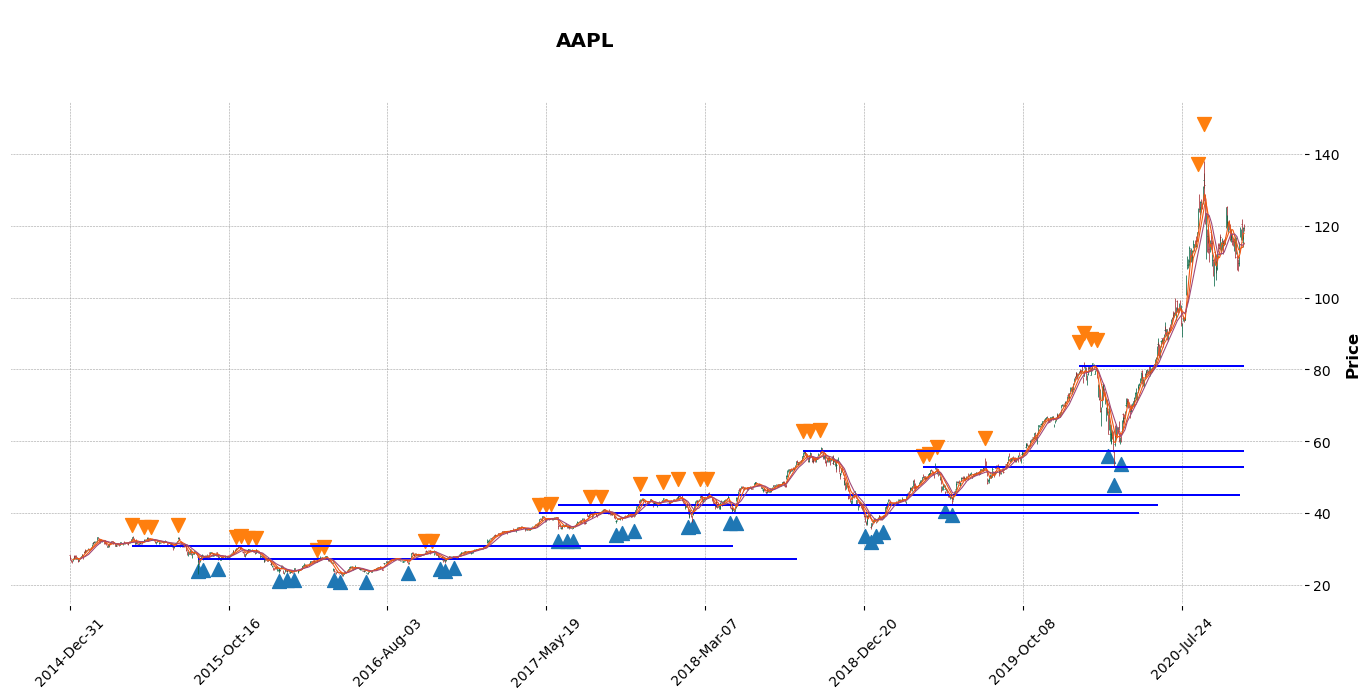

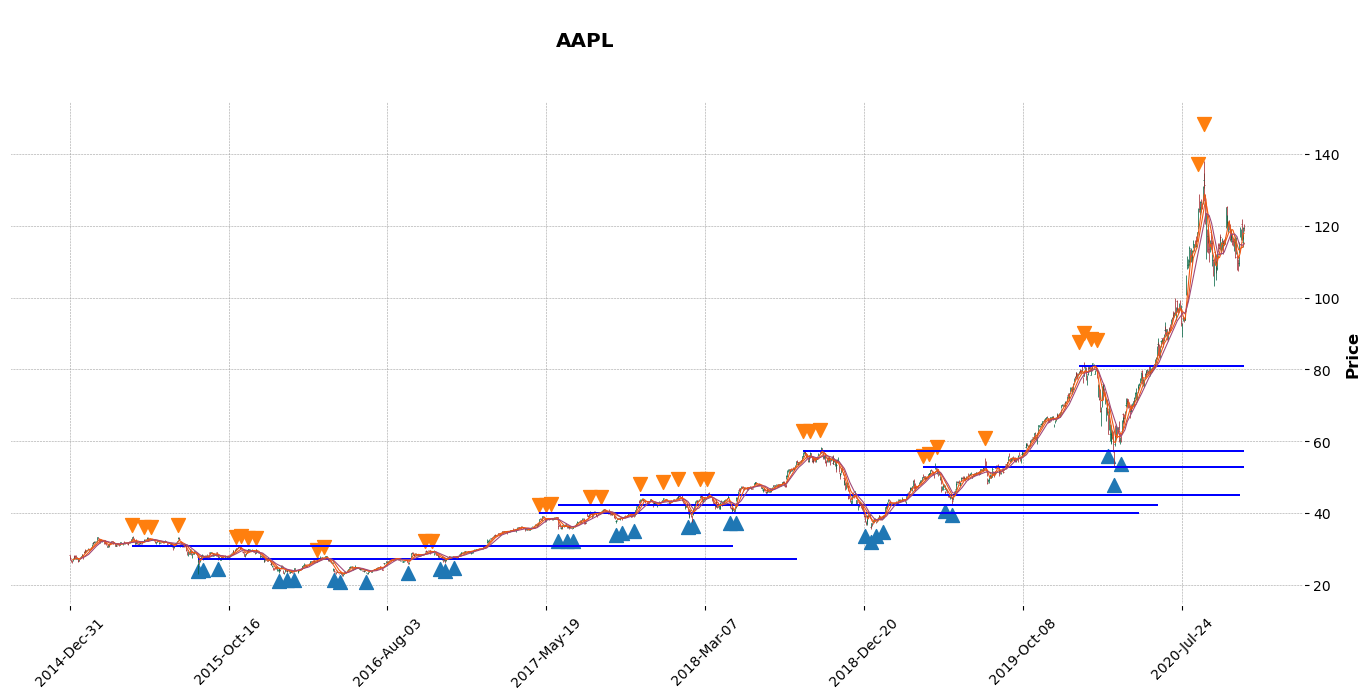

In [8]:
data=get_data('AAPL',start='2015-01-01',end='2020-11-13')
df_High = pd.DataFrame(columns=('High','Time_horizon_set','touching_times_set','craziness_set','n','how', 'crazy'))
df_Low = pd.DataFrame(columns=('Low','n','how', 'crazy','Time_horizon_set','touching_times_set','craziness_set'))
for th in [30,50,80]:
    for tt in [2,3,4]:
        for cr in [0.3,0.4,0.5]:
            dflow, dfhigh = identify_and_merge('AAPL',time_horizon=th,touching_times=tt,craziness=cr,merging_nstd=2,period_max=100)
            dflow['Time_horizon_set']=th
            dflow['touching_times_set']=tt
            dflow['craziness_set']=cr
            dfhigh['Time_horizon_set']=th
            dfhigh['touching_times_set']=tt
            dfhigh['craziness_set']=cr  
            df_High = pd.concat([df_High,dfhigh],axis=0)
            df_Low = pd.concat([df_Low,dflow],axis=0)

In [9]:
df_High

High Time_horizon_set touching_times_set  craziness_set  \
2015-02-23  30.452365               30                  2            0.3   
2015-02-23  30.452365               30                  2            0.3   
2017-05-12  45.673080               30                  2            0.3   
2017-05-12  45.673080               30                  2            0.3   
2018-08-30  56.121250               30                  2            0.3   
...               ...              ...                ...            ...   
2019-04-09  52.876284               80                  4            0.5   
2019-04-09  52.876284               80                  4            0.5   
2020-01-17  80.855937               80                  4            0.5   
2020-01-17  80.855937               80                  4            0.5   
2020-01-17  80.855937               80                  4            0.5   

                 n           how       crazy  
2015-02-23    43.0   touch_limit   39.025002  
2015-02-23    43.0  period_limit   39.025002  
2017-05-12  3710.0   touch_limit   56.257500  
2017-05-12  3710.0  period_limit   56.257500  
2018-08-30     5.0   touch_limit   81.084999  
...            ...           ...         ...  
2019-04-09    11.0  period_limit   79.682503  
2019-04-09    11.0   crazy_limit   79.682503  
2020-01-17     6.0   touch_limit  124.370003  
2020-01-17     6.0  period_limit  124.370003  
2020-01-17     6.0   crazy_limit  124.370003  

[306 rows x 7 columns]

In [10]:
df_Low

Low        n           how      crazy Time_horizon_set  \
2015-03-11  31.005042     15.0   touch_limit  26.440001               30   
2015-03-11  31.005042     15.0  period_limit  26.440001               30   
2015-08-21  27.278750      6.0   touch_limit  23.355000               30   
2015-08-21  27.278750      6.0  period_limit  23.355000               30   
2016-01-28  23.959611     17.0   touch_limit  22.584999               30   
...               ...      ...           ...        ...              ...   
2017-06-12  42.254637  10613.0  period_limit  35.547501               80   
2015-08-21  27.085237     43.0   touch_limit  22.584999               80   
2015-08-21  27.085237     43.0  period_limit  22.584999               80   
2017-06-12  42.254637  10613.0   touch_limit  35.547501               80   
2017-06-12  42.254637  10613.0  period_limit  35.547501               80   

           touching_times_set  craziness_set  
2015-03-11                  2            0.3  
2015-03-11                  2            0.3  
2015-08-21                  2            0.3  
2015-08-21                  2            0.3  
2016-01-28                  2            0.3  
...                       ...            ...  
2017-06-12                  4            0.4  
2015-08-21                  4            0.5  
2015-08-21                  4            0.5  
2017-06-12                  4            0.5  
2017-06-12                  4            0.5  

[252 rows x 7 columns]

In [15]:
pd.pivot_table(df_High,index=['how','Time_horizon_set'],values=None,aggfunc='count')

High  craziness_set  crazy   n  \
how          Time_horizon_set                                   
crazy_limit  30                   6              6      6   6   
             50                  24             24     24  24   
             80                  18             18     18  18   
period_limit 30                  36             36     36  36   
             50                  54             54     54  54   
             80                  54             54     54  54   
touch_limit  30                  27             27     27  27   
             50                  33             33     33  33   
             80                  54             54     54  54   

                               touching_times_set  
how          Time_horizon_set                      
crazy_limit  30                                 6  
             50                                24  
             80                                18  
period_limit 30                                36  
             50                                54  
             80                                54  
touch_limit  30                                27  
             50                                33  
             80                                54

In [16]:
pd.pivot_table(df_High,index=['how','craziness_set'],values=None,aggfunc='count')

High  Time_horizon_set  crazy   n  \
how          craziness_set                                      
crazy_limit  0.3              18                18     18  18   
             0.4              18                18     18  18   
             0.5              12                12     12  12   
period_limit 0.3              48                48     48  48   
             0.4              48                48     48  48   
             0.5              48                48     48  48   
touch_limit  0.3              38                38     38  38   
             0.4              38                38     38  38   
             0.5              38                38     38  38   

                            touching_times_set  
how          craziness_set                      
crazy_limit  0.3                            18  
             0.4                            18  
             0.5                            12  
period_limit 0.3                            48  
             0.4                            48  
             0.5                            48  
touch_limit  0.3                            38  
             0.4                            38  
             0.5                            38

In [25]:
pd.pivot_table(df_High,index=['touching_times_set','how'],values='High',aggfunc='count')

High
touching_times_set how               
2                  crazy_limit     16
                   period_limit    48
                   touch_limit     45
3                  crazy_limit     16
                   period_limit    48
                   touch_limit     36
4                  crazy_limit     16
                   period_limit    48
                   touch_limit     33

In [ ]:
pd.pivot_table(df_High,index=['touching_times_set','how'],values='High',aggfunc='count')

## updated 13 Dec
 主要工作：
- 1.算力受限，优化了点合并算法，取消循环一步到位

- 2.设计线合并算法（存疑）

- 3.比较简单的模型训练



In [9]:
import yfinance as yf
import mplfinance as mpf
from pandas_datareader import data as pdr
yf.pdr_override()
def get_data(stock_code,start,end,interval='1d'):
    data=pdr.get_data_yahoo(tickers=stock_code,
                            interval=interval,
                            start=start,
                            end=end)
    return data
# An example, this api could take a little while to fetch the data
# JUST BE PATIENT
data=get_data('TSLA','2015-01-01','2020-11-13')
data.head()    

[*********************100%***********************]  1 of 1 completed


Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2015-01-02  44.574001  44.650002  42.652000  43.862000  43.862000  23822000
2015-01-05  42.910000  43.299999  41.431999  42.018002  42.018002  26842500
2015-01-06  42.012001  42.840000  40.841999  42.256001  42.256001  31309500
2015-01-07  42.669998  42.956001  41.956001  42.189999  42.189999  14842000
2015-01-08  42.562000  42.759998  42.001999  42.124001  42.124001  17212500

In [3]:
import pandas as pd
import warnings
import datetime
warnings.filterwarnings('ignore')
def local_high_and_low(data,time_horizon):
    data['maxH']=data['Close'].rolling(window=time_horizon,center=True).max()
    data['minL']=data['Close'].rolling(window=time_horizon,center=True).min()
    data['meanH']=data['High'].rolling(window=time_horizon,center=True).mean()
    data['meanL']=data['Low'].rolling(window=time_horizon,center=True).mean()
    data['stdH']=data['High'].rolling(window=time_horizon,center=True).std()
    data['stdL']=data['Low'].rolling(window=time_horizon,center=True).std()
    return data

def identify(data,days=10):
    pointsH=[]
    pointsL=[]
    j = data.index[0]
    for i in data.index:
        
        if data['Close'][i]==data['maxH'][i]:
            if (i-j).days > days:
                pointsH.append(str(i)[0:10])
                j=i
        if data['Close'][i]==data['minL'][i]:
            if (i-j).days > days:
                pointsL.append(str(i)[0:10])
                j=i
            
        
    return pointsH,pointsL

           

  
    
    

In [4]:
import datetime 

def merge_close_point(l,n_std,k=0.01,types='H'):
    unadjusted_points=l.sort_values(by=l.columns[0])
    adjusted_points=[]#需要被调整的集合
    close_points=pd.DataFrame() #需要被调整的集合内的点
    for i in range(len(unadjusted_points)-1):
        n=0
        for j in range(i+1,len(unadjusted_points)):
            if unadjusted_points.iloc[j,0]-unadjusted_points.iloc[i,0]<k*unadjusted_points.iloc[i,0]:
                close_points=close_points.append(unadjusted_points.iloc[[i]],ignore_index=False)
                close_points=close_points.append(unadjusted_points.iloc[[j]],ignore_index=False)
                if n==0:
                    adjusted_points.append(pd.DataFrame())
                    adjusted_points[-1]=adjusted_points[-1].append(unadjusted_points.iloc[[i]],ignore_index=False)
                adjusted_points[-1]=adjusted_points[-1].append(unadjusted_points.iloc[[j]],ignore_index=False)
                n+=1  
#     adjusted_points删除子集
    m=adjusted_points.copy()
    l=[]
    for i in range(len(adjusted_points)-1):
        for j in range(i+1,len(adjusted_points)):

            if set(adjusted_points[j].iloc[:,0])<set(adjusted_points[i].iloc[:,0]):
                if j not in set(l):
                    m[j]='a'
                    l.append(j)
            if set(adjusted_points[i].iloc[:,0])<set(adjusted_points[j].iloc[:,0]):
                if i not in set(l) :
                    m[i]='a'
                    l.append(i)
    adjusted_points=[]
    for i in m:
        if type(i) is not str:
            adjusted_points.append(i)
    
    unadjusted_points = unadjusted_points.append(close_points)
    unadjusted_points = unadjusted_points.append(close_points)
    new_points = unadjusted_points.drop_duplicates(keep=False)
    
    for i in adjusted_points:
       
        std=i.iloc[:,0].std()
        mean=i.iloc[:,0].mean()
        condition=((i[i.columns[0]]<mean+2*std)&(i[i.columns[0]]>mean-2*std))
        j=i[condition]

        j=j.sort_index()
        if len(j)>0:
            new_points=pd.concat([new_points,j.iloc[:,0]],axis=0)
            for pp in j.iloc[:,0].index: 
                new_points.loc[pp]=j.iloc[:,0][0] 
    new_points = new_points.sort_index().drop_duplicates(keep="first")
    
    m=new_points.copy()
    l=[]
    for i in range(len(new_points)-1):
        for j in range(i+1,len(new_points)):
            if types=='H':

                if abs(new_points.iloc[i,1]-new_points.iloc[j,1])< k*new_points.iloc[j,1] and new_points.iloc[j,1]<new_points.iloc[i,1]:
                    if j not in set(l):
                        m.iloc[j,1]='a'
                        l.append(j)
                if abs(new_points.iloc[i,1]-new_points.iloc[j,1])< k*new_points.iloc[i,1] and new_points.iloc[j,1]>new_points.iloc[i,1]:
                    if i not in set(l):
                        m.iloc[i,1]='a'
                        l.append(i)
                        
            if types=='L':
                if abs(new_points.iloc[i,1]-new_points.iloc[j,1])< k*new_points.iloc[j,1] and new_points.iloc[j,1]>new_points.iloc[i,1]:
                    if j not in set(l):
                        m.iloc[j,1]='a'
                        l.append(j)
                if abs(new_points.iloc[i,1]-new_points.iloc[j,1])< k*new_points.iloc[i,1] and new_points.iloc[j,1]<new_points.iloc[i,1]:
                    if i not in set(l):
                        m.iloc[i,1]='a'
                        l.append(i)    

    for i in range(len(m)):
        if type(m.iloc[i,1]) is str:
            new_points.drop(m.iloc[i,:].name,inplace=True)

    return new_points




           
            

In [5]:
def identify_and_merge(data,stock_code='AAPL',time_horizon=50,touching_times=2,craziness=0.2,merging_nstd=2,period_max=50,
                      start='2015-01-01',end='2020-11-13',merge_range=0.2):
    
    data1=local_high_and_low(data,time_horizon)
    pointsH, pointsL = identify(data1)
    df1=pd.DataFrame(data1.loc[:,'Close'][pointsH])


    merged_points1=merge_close_point(df1,merging_nstd,merge_range,types='H').sort_index()

    
    
    
    df2=pd.DataFrame(data1.loc[:,'Close'][pointsL])


    merged_points2=merge_close_point(df2,merging_nstd,merge_range,types='L').sort_index()
    

    
    seq_of_points1=[
         [(str(merged_points1.iloc[i,:].name)[:10],merged_points1.iloc[i,1]),
          (str(max(data1.index))[:10],merged_points1.iloc[i,1])] 
        for i in range(len(merged_points1))
    ]
    seq_of_points2=[
         [(str(merged_points2.iloc[i,:].name)[:10],merged_points2.iloc[i,1]),
          (str(max(data1.index))[:10],merged_points2.iloc[i,1])] 
        
        for i in range(len(merged_points2))
    ]
    seq_of_points=seq_of_points1+seq_of_points2
    
    peak=[]
    troughs=[]
    

    for i in [str(data1.index[j])[0:10] for j in range(len(data1))]:    
        if i in pointsH:
            peak.append(data1.loc[i,'Close']*1.1)
        else: peak.append(np.nan)
        if i in pointsL:
            troughs.append(data1.loc[i,'Close']*0.9)
        else: troughs.append(np.nan)

    apds = [ 
             mpf.make_addplot(troughs,type='scatter',markersize=100,marker='^'),
             mpf.make_addplot(peak,type='scatter',markersize=100,marker='v')
           ]
    mpf.plot(data1,style='charles',title='\n%s'%stock_code,mav=(5,10,15),figratio=(25,10),figscale=1.25,
            alines=dict(alines=seq_of_points,
                        colors=['r' for i in range(len(seq_of_points1))]+['b' for i in range(len(seq_of_points2))],linewidths=0.2),
            addplot=apds,volume=False) 
    return merged_points2,merged_points1  

In [6]:
import numpy as np
def algo(data,time_horizon,merging_nstd,merge_range,date=100,threshold=0.2):
    data0=data.reset_index()
    data1=data.copy().loc[:data.index[date],]
    data1=local_high_and_low(data1,time_horizon)
    pointsH, pointsL = identify(data1)
    df1=pd.DataFrame(data1.loc[:,'Close'][pointsH])


    merged_points1=merge_close_point(df1,merging_nstd,merge_range,types='H').sort_index()
    trace=np.array([0,0,0,0,0,0,0,0])
    ceiling=merged_points1.iloc[-1,1]
    if data1.iloc[-1,3] - ceiling > 0.03*ceiling:
        trace[0]=1
        day=data0[data0['Date']==data1.iloc[-1,:].name].index.values[0]
        if max(data0.iloc[day:day+30,3])/data1.iloc[-1,3]>1.1:
            trace[1]=1
        if max(data0.iloc[day:day+30,3])/data1.iloc[-1,3]>1.15:
            trace[2]=1
        if max(data0.iloc[day:day+30,3])/data1.iloc[-1,3]>1.2:
            trace[3]=1
    
    
    
    df2=pd.DataFrame(data1.loc[:,'Close'][pointsL])


    merged_points2=merge_close_point(df2,merging_nstd,merge_range,types='L').sort_index() 
    
    floor=merged_points2.iloc[-1,1]
    if  floor - data1.iloc[-1,3]> 0.03*floor:
        trace[4]=1
        day=data0[data0['Date']==data1.iloc[-1,:].name].index.values[0]
        if min(data0.iloc[day:day+30,3])/data1.iloc[-1,3]<0.9:
            trace[5]=1
        if min(data0.iloc[day:day+30,3])/data1.iloc[-1,3]<0.85:
            trace[6]=1
        if min(data0.iloc[day:day+30,3])/data1.iloc[-1,3]<0.8:
            trace[7]=1
    return trace



  1%|          | 1/110 [00:00<00:19,  5.48it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             1         0.03               22               1   

   below_floor  success_drop  
0            9             1  


  1%|          | 1/110 [00:00<00:19,  5.72it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           1.5         0.03               22               1   

   below_floor  success_drop  
0            9             1  


  1%|          | 1/110 [00:00<00:18,  5.84it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             2         0.03               22               1   

   below_floor  success_drop  
0            9             1  


  1%|          | 1/110 [00:00<00:11,  9.50it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           2.5         0.03               22               1   

   below_floor  success_drop  
0            9             1  


  1%|          | 1/110 [00:00<00:11,  9.31it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             1         0.03               36               3   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:11,  9.41it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           1.5         0.03               36               3   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:11,  9.22it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             2         0.03               36               3   

   below_floor  success_drop  
0           25             1  


  2%|▏         | 2/110 [00:00<00:07, 14.17it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           2.5         0.03               36               3   

   below_floor  success_drop  
0           25             1  


  2%|▏         | 2/110 [00:00<00:07, 14.42it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             1         0.03               41               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:07, 14.54it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           1.5         0.03               41               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:07, 13.81it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             2         0.03               41               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:05, 18.25it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           2.5         0.03               41               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:05, 19.82it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             1         0.03               43               2   

   below_floor  success_drop  
0            9             0  


  2%|▏         | 2/110 [00:00<00:05, 19.98it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           1.5         0.03               43               2   

   below_floor  success_drop  
0            9             0  


  2%|▏         | 2/110 [00:00<00:05, 18.84it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             2         0.03               43               2   

   below_floor  success_drop  
0            9             0  


  2%|▏         | 2/110 [00:00<00:05, 19.94it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           2.5         0.03               43               2   

   below_floor  success_drop  
0            9             0  


  3%|▎         | 3/110 [00:00<00:05, 20.23it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             1         0.03               26               2   

   below_floor  success_drop  
0            8             0  


  3%|▎         | 3/110 [00:00<00:05, 19.99it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           1.5         0.03               26               2   

   below_floor  success_drop  
0            8             0  


  2%|▏         | 2/110 [00:00<00:05, 19.87it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             2         0.03               26               2   

   below_floor  success_drop  
0            8             0  


  1%|          | 1/110 [00:00<00:20,  5.22it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           2.5         0.03               26               2   

   below_floor  success_drop  
0            8             0  


  1%|          | 1/110 [00:00<00:21,  5.16it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             1         0.06               41               1   

   below_floor  success_drop  
0           17             1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           1.5         0.06               41               1   

   below_floor  success_drop  
0           17             1  


  1%|          | 1/110 [00:00<00:21,  5.17it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             2         0.06               41               1   

   below_floor  success_drop  
0           17             1  


  1%|          | 1/110 [00:00<00:12,  8.72it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           2.5         0.06               41               1   

   below_floor  success_drop  
0           17             1  


  1%|          | 1/110 [00:00<00:12,  8.98it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             1         0.06               53               3   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:11,  9.18it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           1.5         0.06               53               3   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:12,  8.74it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             2         0.06               53               3   

   below_floor  success_drop  
0           25             1  


  2%|▏         | 2/110 [00:00<00:09, 11.78it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           2.5         0.06               53               3   

   below_floor  success_drop  
0           25             1  


  2%|▏         | 2/110 [00:00<00:09, 11.67it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             1         0.06               47               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:09, 11.97it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           1.5         0.06               47               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:09, 11.48it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             2         0.06               47               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:05, 19.65it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           2.5         0.06               47               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:05, 19.99it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             1         0.06               48               2   

   below_floor  success_drop  
0            9             0  


  3%|▎         | 3/110 [00:00<00:05, 20.00it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           1.5         0.06               48               2   

   below_floor  success_drop  
0            9             0  


  2%|▏         | 2/110 [00:00<00:05, 19.76it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             2         0.06               48               2   

   below_floor  success_drop  
0            9             0  


  2%|▏         | 2/110 [00:00<00:05, 19.89it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           2.5         0.06               48               2   

   below_floor  success_drop  
0            9             0  


  3%|▎         | 3/110 [00:00<00:05, 19.73it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             1         0.06               44               2   

   below_floor  success_drop  
0            8             0  


  3%|▎         | 3/110 [00:00<00:05, 20.02it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           1.5         0.06               44               2   

   below_floor  success_drop  
0            8             0  


  3%|▎         | 3/110 [00:00<00:05, 20.15it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             2         0.06               44               2   

   below_floor  success_drop  
0            8             0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           2.5         0.06               44               2   

   below_floor  success_drop  
0            8             0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             1         0.09               39               2   

   below_floor  success_drop  
0           30             1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           1.5         0.09               39               2   

   below_floor  success_drop  
0           30             1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             2         0.09               39               2   

   below_floor  success_drop  
0           30             1  


  1%|          | 1/110 [00:00<00:13,  8.27it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           2.5         0.09               39               2   

   below_floor  success_drop  
0           30             1  


  1%|          | 1/110 [00:00<00:13,  8.23it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             1         0.09               62               3   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:13,  8.27it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           1.5         0.09               62               3   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:13,  8.02it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             2         0.09               62               3   

   below_floor  success_drop  
0           25             1  


  2%|▏         | 2/110 [00:00<00:10, 10.20it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           2.5         0.09               62               3   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:11,  9.81it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             1         0.09               55               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:10, 10.20it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           1.5         0.09               55               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:10, 10.34it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             2         0.09               55               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:06, 17.32it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           2.5         0.09               55               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:06, 15.64it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             1         0.09               51               2   

   below_floor  success_drop  
0            4             0  


  2%|▏         | 2/110 [00:00<00:06, 17.35it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           1.5         0.09               51               2   

   below_floor  success_drop  
0            4             0  


  2%|▏         | 2/110 [00:00<00:06, 17.20it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             2         0.09               51               2   

   below_floor  success_drop  
0            4             0  


  2%|▏         | 2/110 [00:00<00:06, 16.42it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           2.5         0.09               51               2   

   below_floor  success_drop  
0            4             0  


  2%|▏         | 2/110 [00:00<00:06, 17.19it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             1         0.09               49               2   

   below_floor  success_drop  
0            8             0  


  2%|▏         | 2/110 [00:00<00:06, 16.93it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           1.5         0.09               49               2   

   below_floor  success_drop  
0            8             0  


  2%|▏         | 2/110 [00:00<00:06, 16.90it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             2         0.09               49               2   

   below_floor  success_drop  
0            8             0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           2.5         0.09               49               2   

   below_floor  success_drop  
0            8             0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             1         0.12               48               2   

   below_floor  success_drop  
0           25             1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           1.5         0.12               48               2   

   below_floor  success_drop  
0           25             1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             2         0.12               48               2   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:15,  6.91it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           2.5         0.12               48               2   

   below_floor  success_drop  
0           25             1  


  1%|          | 1/110 [00:00<00:16,  6.79it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             1         0.12               68               3   

   below_floor  success_drop  
0           27             1  


  1%|          | 1/110 [00:00<00:15,  6.95it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           1.5         0.12               68               3   

   below_floor  success_drop  
0           27             1  


  1%|          | 1/110 [00:00<00:16,  6.79it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             2         0.12               68               3   

   below_floor  success_drop  
0           27             1  


  1%|          | 1/110 [00:00<00:12,  8.91it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           2.5         0.12               68               3   

   below_floor  success_drop  
0           27             1  


  1%|          | 1/110 [00:00<00:12,  8.55it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             1         0.12               45               2   

   below_floor  success_drop  
0            9             0  


  1%|          | 1/110 [00:00<00:12,  8.68it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           1.5         0.12               45               2   

   below_floor  success_drop  
0            9             0  


  1%|          | 1/110 [00:00<00:12,  8.56it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             2         0.12               45               2   

   below_floor  success_drop  
0            9             0  


  2%|▏         | 2/110 [00:00<00:07, 15.16it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           2.5         0.12               45               2   

   below_floor  success_drop  
0            9             0  


  2%|▏         | 2/110 [00:00<00:07, 14.95it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             1         0.12               41               2   

   below_floor  success_drop  
0            4             0  


  2%|▏         | 2/110 [00:00<00:07, 14.92it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           1.5         0.12               41               2   

   below_floor  success_drop  
0            4             0  


  2%|▏         | 2/110 [00:00<00:07, 14.88it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             2         0.12               41               2   

   below_floor  success_drop  
0            4             0  


  2%|▏         | 2/110 [00:00<00:07, 14.84it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           2.5         0.12               41               2   

   below_floor  success_drop  
0            4             0  


  2%|▏         | 2/110 [00:00<00:07, 14.95it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             1         0.12               43               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:07, 15.24it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           1.5         0.12               43               2   

   below_floor  success_drop  
0           11             0  


  2%|▏         | 2/110 [00:00<00:07, 14.93it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             2         0.12               43               2   

   below_floor  success_drop  
0           11             0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           2.5         0.12               43               2   

   below_floor  success_drop  
0           11             0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             1         0.15               51               2   

   below_floor  success_drop  
0           12             1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           1.5         0.15               51               2   

   below_floor  success_drop  
0           12             1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10             2         0.15               51               2   

   below_floor  success_drop  
0           12             1  


  1%|          | 1/110 [00:00<00:18,  5.89it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            10           2.5         0.15               51               2   

   below_floor  success_drop  
0           12             1  


  1%|          | 1/110 [00:00<00:18,  5.93it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             1         0.15               55               3   

   below_floor  success_drop  
0           11             0  


  1%|          | 1/110 [00:00<00:18,  5.83it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           1.5         0.15               55               3   

   below_floor  success_drop  
0           11             0  


  1%|          | 1/110 [00:00<00:18,  5.97it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20             2         0.15               55               3   

   below_floor  success_drop  
0           11             0  


  1%|          | 1/110 [00:00<00:12,  8.72it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            20           2.5         0.15               55               3   

   below_floor  success_drop  
0           11             0  


  1%|          | 1/110 [00:00<00:12,  8.51it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             1         0.15               46               2   

   below_floor  success_drop  
0            8             0  


  1%|          | 1/110 [00:00<00:12,  8.57it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           1.5         0.15               46               2   

   below_floor  success_drop  
0            8             0  


  1%|          | 1/110 [00:00<00:12,  8.66it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30             2         0.15               46               2   

   below_floor  success_drop  
0            8             0  


  2%|▏         | 2/110 [00:00<00:07, 14.95it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            30           2.5         0.15               46               2   

   below_floor  success_drop  
0            8             0  


  2%|▏         | 2/110 [00:00<00:07, 14.95it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             1         0.15               43               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:07, 15.20it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           1.5         0.15               43               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:07, 15.16it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40             2         0.15               43               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:07, 15.23it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            40           2.5         0.15               43               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:07, 14.93it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             1         0.15               45               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:07, 14.66it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           1.5         0.15               45               2   

   below_floor  success_drop  
0            6             0  


  2%|▏         | 2/110 [00:00<00:07, 15.31it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50             2         0.15               45               2   

   below_floor  success_drop  
0            6             0  


100%|██████████| 110/110 [00:25<00:00,  4.27it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  success_growth  \
0            50           2.5         0.15               45               2   

   below_floor  success_drop  
0            6             0  


time_horizon merging_nstd  merge_range through_ceiling success_growth  \
0            10            1         0.03              22              1   
1            10          1.5         0.03              22              1   
2            10            2         0.03              22              1   
3            10          2.5         0.03              22              1   
4            20            1         0.03              36              3   
..          ...          ...          ...             ...            ...   
95           40          2.5         0.15              43              2   
96           50            1         0.15              45              2   
97           50          1.5         0.15              45              2   
98           50            2         0.15              45              2   
99           50          2.5         0.15              45              2   

   below_floor success_drop  
0            9            1  
1            9            1  
2            9            1  
3            9            1  
4           25            1  
..         ...          ...  
95           6            0  
96           6            0  
97           6            0  
98           6            0  
99           6            0  

[100 rows x 7 columns]

In [6]:
import numpy as np
def algo(data,time_horizon,merging_nstd,merge_range,date=100,threshold=0.2):
    data0=data.reset_index()
    data1=data.copy().loc[:data.index[date],]
    data1=local_high_and_low(data1,time_horizon)
    pointsH, pointsL = identify(data1)
    df1=pd.DataFrame(data1.loc[:,'Close'][pointsH])


    merged_points1=merge_close_point(df1,merging_nstd,merge_range,types='H').sort_index()
    trace=np.array([0,0,0,0,0,0,0,0])
    ceiling=merged_points1.iloc[-1,1]
    if data1.iloc[-1,3] - ceiling > 0.03*ceiling:
        trace[0]=1
        day=data0[data0['Date']==data1.iloc[-1,:].name].index.values[0]
        if max(data0.iloc[day:day+30,3])/data1.iloc[-1,3]>1.1:
            trace[1]=1
        if max(data0.iloc[day:day+30,3])/data1.iloc[-1,3]>1.15:
            trace[2]=1
        if max(data0.iloc[day:day+30,3])/data1.iloc[-1,3]>1.2:
            trace[3]=1
    
    
    
    df2=pd.DataFrame(data1.loc[:,'Close'][pointsL])


    merged_points2=merge_close_point(df2,merging_nstd,merge_range,types='L').sort_index() 
    
    floor=merged_points2.iloc[-1,1]
    if  floor - data1.iloc[-1,3]> 0.03*floor:
        trace[4]=1
        day=data0[data0['Date']==data1.iloc[-1,:].name].index.values[0]
        if min(data0.iloc[day:day+30,3])/data1.iloc[-1,3]<0.9:
            trace[5]=1
        if min(data0.iloc[day:day+30,3])/data1.iloc[-1,3]<0.85:
            trace[6]=1
        if min(data0.iloc[day:day+30,3])/data1.iloc[-1,3]<0.8:
            trace[7]=1
    return trace



In [7]:
from tqdm import tqdm
result = pd.DataFrame(columns=['time_horizon', 'merging_nstd', 'merge_range', 'through_ceiling',
                             'success_growth_10%',
                             'success_growth_15%',
                              'success_growth_20%',
                              'below_floor',
                              'success_drop_10%',
                             'success_drop_15%',
                             'success_drop_20%']) 
for i in [.03,.06,.09,.12,.15]:
    for j in [10,20,30,40,50]:
        for l in [1,1.5,2,2.5]:
            p=np.array([0,0,0,0,0,0,0,0])
            for days in tqdm(range(300,1400,10)):
                try:
                    p=p+algo(data,j,l,i,days)
                except:
                    continue
            new=pd.DataFrame({'time_horizon':j, 'merging_nstd':l, 'merge_range':i, 'through_ceiling':p[0],
                             'success_growth_10%':p[1],
                             'success_growth_15%':p[2],
                              'success_growth_20%':p[3],
                              'below_floor':p[4],
                              'success_drop_10%':p[5],
                             'success_drop_15%':p[6],
                             'success_drop_20%':p[7],},index=["0"])
            print(new)
            result=result.append(new,ignore_index=True)
            
            
result 

  1%|          | 1/110 [00:00<00:18,  5.83it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10             1         0.03               22   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                   8                   2                   1            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 4                 3                 1  


  1%|          | 1/110 [00:00<00:18,  5.81it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10           1.5         0.03               22   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                   8                   2                   1            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 4                 3                 1  


  1%|          | 1/110 [00:00<00:18,  5.94it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10             2         0.03               22   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                   8                   2                   1            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 4                 3                 1  


  1%|          | 1/110 [00:00<00:11,  9.77it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10           2.5         0.03               22   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                   8                   2                   1            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 4                 3                 1  


  1%|          | 1/110 [00:00<00:11,  9.51it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20             1         0.03               36   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  16                   9                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:11,  9.49it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20           1.5         0.03               36   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  16                   9                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:11,  9.65it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20             2         0.03               36   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  16                   9                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  2%|▏         | 2/110 [00:00<00:07, 14.39it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20           2.5         0.03               36   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  16                   9                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  2%|▏         | 2/110 [00:00<00:07, 14.32it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30             1         0.03               41   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   5                   2           11   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 2                 1                 0  


  2%|▏         | 2/110 [00:00<00:07, 14.49it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30           1.5         0.03               41   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   5                   2           11   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 2                 1                 0  


  2%|▏         | 2/110 [00:00<00:07, 14.42it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30             2         0.03               41   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   5                   2           11   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 2                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 20.58it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30           2.5         0.03               41   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   5                   2           11   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 2                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 20.03it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40             1         0.03               43   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  10                   5                   2            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  2%|▏         | 2/110 [00:00<00:05, 19.09it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40           1.5         0.03               43   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  10                   5                   2            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 19.82it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40             2         0.03               43   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  10                   5                   2            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 19.77it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40           2.5         0.03               43   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  10                   5                   2            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 19.67it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50             1         0.03               26   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                   9                   5                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 19.88it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50           1.5         0.03               26   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                   9                   5                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 19.93it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50             2         0.03               26   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                   9                   5                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  1%|          | 1/110 [00:00<00:20,  5.39it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50           2.5         0.03               26   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                   9                   5                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  1%|          | 1/110 [00:00<00:21,  5.16it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10             1         0.06               41   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   3                   1           17   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 4                 3                 1  


  1%|          | 1/110 [00:00<00:20,  5.37it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10           1.5         0.06               41   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   3                   1           17   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 4                 3                 1  


  1%|          | 1/110 [00:00<00:21,  5.04it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10             2         0.06               41   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   3                   1           17   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 4                 3                 1  


  1%|          | 1/110 [00:00<00:12,  8.79it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10           2.5         0.06               41   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   3                   1           17   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 4                 3                 1  


  1%|          | 1/110 [00:00<00:12,  9.00it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20             1         0.06               53   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  16                   9                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:13,  8.30it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20           1.5         0.06               53   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  16                   9                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:12,  8.64it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20             2         0.06               53   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  16                   9                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  2%|▏         | 2/110 [00:00<00:09, 11.60it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20           2.5         0.06               53   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  16                   9                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  2%|▏         | 2/110 [00:00<00:09, 11.59it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30             1         0.06               47   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   5                   2           11   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 2                 1                 0  


  2%|▏         | 2/110 [00:00<00:09, 11.62it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30           1.5         0.06               47   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   5                   2           11   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 2                 1                 0  


  2%|▏         | 2/110 [00:00<00:09, 11.91it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30             2         0.06               47   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   5                   2           11   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 2                 1                 0  


  2%|▏         | 2/110 [00:00<00:05, 19.90it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30           2.5         0.06               47   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  11                   5                   2           11   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 2                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 19.88it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40             1         0.06               48   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   5                   2            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  2%|▏         | 2/110 [00:00<00:05, 19.97it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40           1.5         0.06               48   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   5                   2            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  2%|▏         | 2/110 [00:00<00:05, 19.85it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40             2         0.06               48   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   5                   2            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  2%|▏         | 2/110 [00:00<00:05, 19.94it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40           2.5         0.06               48   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   5                   2            9   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 20.45it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50             1         0.06               44   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   5                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  3%|▎         | 3/110 [00:00<00:05, 19.98it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50           1.5         0.06               44   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   5                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  2%|▏         | 2/110 [00:00<00:05, 19.98it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50             2         0.06               44   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   5                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50           2.5         0.06               44   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   5                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10           1.5         0.09               39   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  10                   4                   2           30   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10             2         0.09               39   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  10                   4                   2           30   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:13,  8.13it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10           2.5         0.09               39   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  10                   4                   2           30   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:12,  8.47it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20             1         0.09               62   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  17                   8                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:13,  8.23it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20           1.5         0.09               62   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  17                   8                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:13,  8.29it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20             2         0.09               62   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  17                   8                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  2%|▏         | 2/110 [00:00<00:10, 10.34it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20           2.5         0.09               62   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  17                   8                   3           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:11,  9.40it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30             1         0.09               55   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   4                   2            6   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 0                 0  


  2%|▏         | 2/110 [00:00<00:10, 10.26it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30           1.5         0.09               55   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   4                   2            6   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 0                 0  


  2%|▏         | 2/110 [00:00<00:10, 10.36it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30             2         0.09               55   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   4                   2            6   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 0                 0  


  2%|▏         | 2/110 [00:00<00:06, 17.45it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            30           2.5         0.09               55   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   4                   2            6   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 0                 0  


  2%|▏         | 2/110 [00:00<00:06, 17.02it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40             1         0.09               51   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   4                   2            4   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 0                 0                 0  


  2%|▏         | 2/110 [00:00<00:06, 17.05it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40           1.5         0.09               51   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   4                   2            4   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 0                 0                 0  


  2%|▏         | 2/110 [00:00<00:06, 17.35it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40             2         0.09               51   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   4                   2            4   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 0                 0                 0  


  2%|▏         | 2/110 [00:00<00:06, 17.30it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            40           2.5         0.09               51   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   4                   2            4   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 0                 0                 0  


  2%|▏         | 2/110 [00:00<00:06, 17.14it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50             1         0.09               49   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  14                   6                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  2%|▏         | 2/110 [00:00<00:06, 17.01it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50           1.5         0.09               49   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  14                   6                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  2%|▏         | 2/110 [00:00<00:06, 16.90it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50             2         0.09               49   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  14                   6                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            50           2.5         0.09               49   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  14                   6                   2            8   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 1                 1                 0  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10             1         0.12               48   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   6                   2           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10           1.5         0.12               48   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   6                   2           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  0%|          | 0/110 [00:00<?, ?it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10             2         0.12               48   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   6                   2           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:15,  7.03it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            10           2.5         0.12               48   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  12                   6                   2           25   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:15,  6.96it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20             1         0.12               68   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  18                   8                   3           27   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:15,  7.18it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20           1.5         0.12               68   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  18                   8                   3           27   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:15,  6.91it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20             2         0.12               68   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  18                   8                   3           27   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


  1%|          | 1/110 [00:00<00:12,  8.64it/s]

   time_horizon  merging_nstd  merge_range  through_ceiling  \
0            20           2.5         0.12               68   

   success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
0                  18                   8                   3           27   

   success_drop_10%  success_drop_15%  success_drop_20%  
0                 5                 3                 1  


 89%|████████▉ | 98/110 [00:36<00:07,  1.63it/s]IOPub message rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_msg_rate_limit`.

Current values:
NotebookApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [9]:
result['growth_10%_percentage']=result['success_growth_10%']/result['through_ceiling']
result['growth_15%_percentage']=result['success_growth_15%']/result['through_ceiling']
result['growth_20%_percentage']=result['success_growth_20%']/result['through_ceiling']
result['dropped_10%_percentage']=result['success_drop_10%']/result['below_floor']
result['dropped_15%_percentage']=result['success_drop_15%']/result['below_floor']
result['dropped_20%_percentage']=result['success_drop_20%']/result['below_floor']


In [2]:
import scipy.io as sio
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
#result.to_csv('result.csv')
#result=pd.read_csv('result.csv',index_col=0)
result.sort_values(by=['growth_10%_percentage'])

time_horizon  merging_nstd  merge_range  through_ceiling  \
79            50           2.5         0.12               43   
78            50           2.0         0.12               43   
77            50           1.5         0.12               43   
76            50           1.0         0.12               43   
49            30           1.5         0.09               55   
..           ...           ...          ...              ...   
0             10           1.0         0.03               22   
4             20           1.0         0.03               36   
5             20           1.5         0.03               36   
6             20           2.0         0.03               36   
7             20           2.5         0.03               36   

    success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
79                   9                   4                   2           11   
78                   9                   4                   2           11   
77                   9                   4                   2           11   
76                   9                   4                   2           11   
49                  12                   4                   2            6   
..                 ...                 ...                 ...          ...   
0                    8                   2                   1            9   
4                   16                   9                   3           25   
5                   16                   9                   3           25   
6                   16                   9                   3           25   
7                   16                   9                   3           25   

    success_drop_10%  success_drop_15%  success_drop_20%  \
79                 1                 1                 0   
78                 1                 1                 0   
77                 1                 1                 0   
76                 1                 1                 0   
49                 1                 0                 0   
..               ...               ...               ...   
0                  4                 3                 1   
4                  5                 3                 1   
5                  5                 3                 1   
6                  5                 3                 1   
7                  5                 3                 1   

    growth_10%_percentage  growth_15%_percentage  growth_20%_percentage  \
79               0.209302               0.093023               0.046512   
78               0.209302               0.093023               0.046512   
77               0.209302               0.093023               0.046512   
76               0.209302               0.093023               0.046512   
49               0.218182               0.072727               0.036364   
..                    ...                    ...                    ...   
0                0.363636               0.090909               0.045455   
4                0.444444               0.250000               0.083333   
5                0.444444               0.250000               0.083333   
6                0.444444               0.250000               0.083333   
7                0.444444               0.250000               0.083333   

    dropped_10%_percentage  dropped_15%_percentage  dropped_20%_percentage  
79                0.090909                0.090909                0.000000  
78                0.090909                0.090909                0.000000  
77                0.090909                0.090909                0.000000  
76                0.090909                0.090909                0.000000  
49                0.166667                0.000000                0.000000  
..                     ...                     ...                     ...  
0                 0.444444                0.333333                0.111111  
4                 0.200000                0.1200

In [12]:
result.sort_values(by=['growth_15%_percentage'])

time_horizon  merging_nstd  merge_range  through_ceiling  \
49            30           1.5         0.09               55   
48            30           1.0         0.09               55   
50            30           2.0         0.09               55   
51            30           2.5         0.09               55   
20            10           1.0         0.06               41   
..           ...           ...          ...              ...   
19            50           2.5         0.03               26   
5             20           1.5         0.03               36   
7             20           2.5         0.03               36   
4             20           1.0         0.03               36   
6             20           2.0         0.03               36   

    success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
49                  12                   4                   2            6   
48                  12                   4                   2            6   
50                  12                   4                   2            6   
51                  12                   4                   2            6   
20                  11                   3                   1           17   
..                 ...                 ...                 ...          ...   
19                   9                   5                   2            8   
5                   16                   9                   3           25   
7                   16                   9                   3           25   
4                   16                   9                   3           25   
6                   16                   9                   3           25   

    success_drop_10%  success_drop_15%  success_drop_20%  \
49                 1                 0                 0   
48                 1                 0                 0   
50                 1                 0                 0   
51                 1                 0                 0   
20                 4                 3                 1   
..               ...               ...               ...   
19                 1                 1                 0   
5                  5                 3                 1   
7                  5                 3                 1   
4                  5                 3                 1   
6                  5                 3                 1   

    growth_10%_percentage  growth_15%_percentage  growth_20%_percentage  \
49               0.218182               0.072727               0.036364   
48               0.218182               0.072727               0.036364   
50               0.218182               0.072727               0.036364   
51               0.218182               0.072727               0.036364   
20               0.268293               0.073171               0.024390   
..                    ...                    ...                    ...   
19               0.346154               0.192308               0.076923   
5                0.444444               0.250000               0.083333   
7                0.444444               0.250000               0.083333   
4                0.444444               0.250000               0.083333   
6                0.444444               0.250000               0.083333   

    dropped_10%_percentage  dropped_15%_percentage  dropped_20%_percentage  
49                0.166667                0.000000                0.000000  
48                0.166667                0.000000                0.000000  
50                0.166667                0.000000                0.000000  
51                0.166667                0.000000                0.000000  
20                0.235294                0.176471                0.058824  
..                     ...                     ...                     ...  
19                0.125000                0.125000                0.000000  
5                 0.200000                0.1200

In [13]:
result.sort_values(by=['growth_20%_percentage'])

time_horizon  merging_nstd  merge_range  through_ceiling  \
23            10           2.5         0.06               41   
22            10           2.0         0.06               41   
21            10           1.5         0.06               41   
20            10           1.0         0.06               41   
50            30           2.0         0.09               55   
..           ...           ...          ...              ...   
17            50           1.5         0.03               26   
6             20           2.0         0.03               36   
5             20           1.5         0.03               36   
4             20           1.0         0.03               36   
7             20           2.5         0.03               36   

    success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
23                  11                   3                   1           17   
22                  11                   3                   1           17   
21                  11                   3                   1           17   
20                  11                   3                   1           17   
50                  12                   4                   2            6   
..                 ...                 ...                 ...          ...   
17                   9                   5                   2            8   
6                   16                   9                   3           25   
5                   16                   9                   3           25   
4                   16                   9                   3           25   
7                   16                   9                   3           25   

    success_drop_10%  success_drop_15%  success_drop_20%  \
23                 4                 3                 1   
22                 4                 3                 1   
21                 4                 3                 1   
20                 4                 3                 1   
50                 1                 0                 0   
..               ...               ...               ...   
17                 1                 1                 0   
6                  5                 3                 1   
5                  5                 3                 1   
4                  5                 3                 1   
7                  5                 3                 1   

    growth_10%_percentage  growth_15%_percentage  growth_20%_percentage  \
23               0.268293               0.073171               0.024390   
22               0.268293               0.073171               0.024390   
21               0.268293               0.073171               0.024390   
20               0.268293               0.073171               0.024390   
50               0.218182               0.072727               0.036364   
..                    ...                    ...                    ...   
17               0.346154               0.192308               0.076923   
6                0.444444               0.250000               0.083333   
5                0.444444               0.250000               0.083333   
4                0.444444               0.250000               0.083333   
7                0.444444               0.250000               0.083333   

    dropped_10%_percentage  dropped_15%_percentage  dropped_20%_percentage  
23                0.235294                0.176471                0.058824  
22                0.235294                0.176471                0.058824  
21                0.235294                0.176471                0.058824  
20                0.235294                0.176471                0.058824  
50                0.166667                0.000000                0.000000  
..                     ...                     ...                     ...  
17                0.125000                0.125000                0.000000  
6                 0.200000                0.1200

In [16]:
result.sort_values(by=['dropped_20%_percentage'])

time_horizon  merging_nstd  merge_range  through_ceiling  \
49            30           1.5         0.09               55   
73            40           1.5         0.12               41   
72            40           1.0         0.12               41   
71            30           2.5         0.12               45   
70            30           2.0         0.12               45   
..           ...           ...          ...              ...   
80            10           1.0         0.15               51   
3             10           2.5         0.03               22   
2             10           2.0         0.03               22   
1             10           1.5         0.03               22   
0             10           1.0         0.03               22   

    success_growth_10%  success_growth_15%  success_growth_20%  below_floor  \
49                  12                   4                   2            6   
73                   9                   4                   2            4   
72                   9                   4                   2            4   
71                  10                   4                   2            9   
70                  10                   4                   2            9   
..                 ...                 ...                 ...          ...   
80                  15                   6                   2           12   
3                    8                   2                   1            9   
2                    8                   2                   1            9   
1                    8                   2                   1            9   
0                    8                   2                   1            9   

    success_drop_10%  success_drop_15%  success_drop_20%  \
49                 1                 0                 0   
73                 0                 0                 0   
72                 0                 0                 0   
71                 4                 1                 0   
70                 4                 1                 0   
..               ...               ...               ...   
80                 2                 1                 1   
3                  4                 3                 1   
2                  4                 3                 1   
1                  4                 3                 1   
0                  4                 3                 1   

    growth_10%_percentage  growth_15%_percentage  growth_20%_percentage  \
49               0.218182               0.072727               0.036364   
73               0.219512               0.097561               0.048780   
72               0.219512               0.097561               0.048780   
71               0.222222               0.088889               0.044444   
70               0.222222               0.088889               0.044444   
..                    ...                    ...                    ...   
80               0.294118               0.117647               0.039216   
3                0.363636               0.090909               0.045455   
2                0.363636               0.090909               0.045455   
1                0.363636               0.090909               0.045455   
0                0.363636               0.090909               0.045455   

    dropped_10%_percentage  dropped_15%_percentage  dropped_20%_percentage  
49                0.166667                0.000000                0.000000  
73                0.000000                0.000000                0.000000  
72                0.000000                0.000000                0.000000  
71                0.444444                0.111111                0.000000  
70                0.444444                0.111111                0.000000  
..                     ...                     ...                     ...  
80                0.166667                0.083333                0.083333  
3                 0.444444                0.3333

In [23]:
result.iloc[:,-3].quantile(q=0.25)

0.1111111111111111

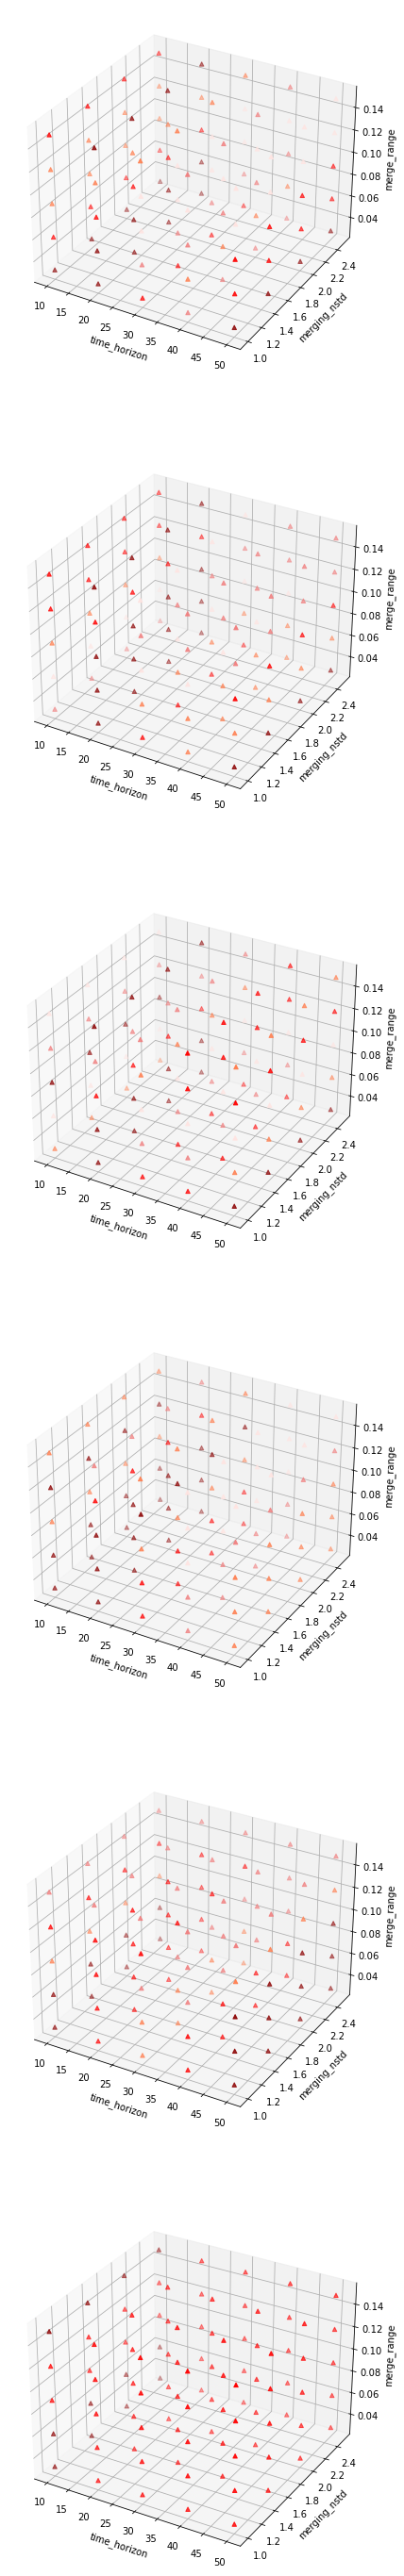

In [10]:
def Detectionplot(result):

 
    

    fig = plt.figure(figsize=(600,50))
       #此处因为是要和其他的图像一起展示，用的add_subplot，如果只是展示一幅图的话，可以用subplot即可

    x = result.iloc[:,0]
    y = result.iloc[:,1]
    z = result.iloc[:,2]
    for i in range(6):
        ax = fig.add_subplot(611+i, projection='3d')
        c = result.iloc[:,-6+i]
        C=[]
        for a in c:
            if a < c.quantile(q=0.2):
                C.append('mistyrose')
            elif a < c.quantile(q=0.4):
                C.append('lightcoral')
            elif a < c.quantile(q=0.6):
                C.append('coral')
            elif a < c.quantile(q=0.8):
                C.append('r')
            elif a >= c.quantile(q=0.8):
                C.append('darkred')




#此处dx，dy，dz是决定在3D柱形图中的柱形的长宽高三个变量
        
        
        

#设置三个维度的标签
        ax.set_xlabel('time_horizon')
        ax.set_ylabel('merging_nstd')
        ax.set_zlabel('merge_range')

        ax.scatter(x, y, z, c = C, marker = '^')

    plt.show()

Detectionplot(result)

## Trading Algorithm

[*********************100%***********************]  1 of 1 completed


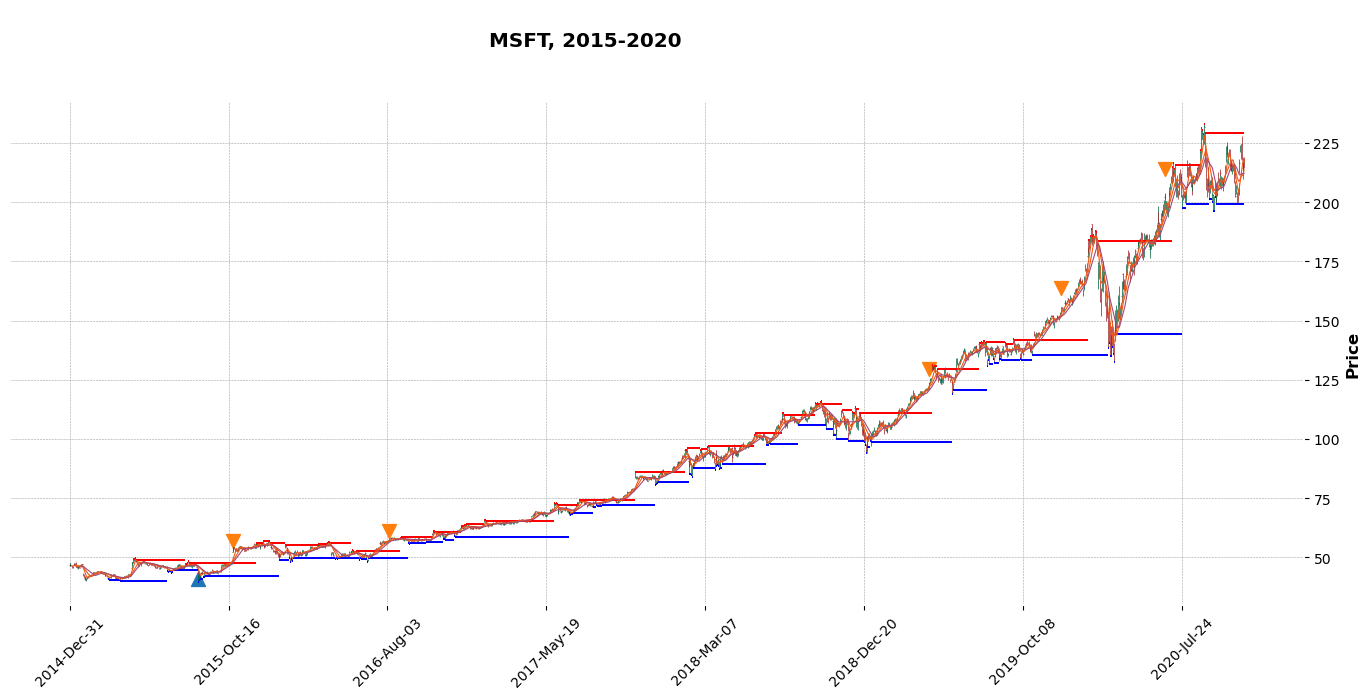

In [56]:
import pandas as pd
import warnings
data=get_data('MSFT','2015-01-01','2020-11-13')
warnings.filterwarnings('ignore')
data1=data.loc['2015-01-01':'2020-11-12']
data1['50maxH']=data1['High'].rolling(window=50,center=True).max()
data1['50minL']=data1['Low'].rolling(window=50,center=True).min()
data1['50meanH']=data1['High'].rolling(window=50,center=True).mean()
data1['50meanL']=data1['Low'].rolling(window=50,center=True).mean()
data1['50stdH']=data1['High'].rolling(window=50,center=True).std()
data1['50stdL']=data1['Low'].rolling(window=50,center=True).std()
data2=data1.dropna()
pointsH=[]
pointsL=[]
for i in data2.index:
    #if data2['High'][i]-2*data2['50stdH'][i]>data2['50meanH'][i]:
    if data2['High'][i]==data2['50maxH'][i] or data2['High'][i]-data2['50stdH'][i]>data2['50meanH'][i]:
        pointsH.append(str(i)[0:10])
    #if data2['Low'][i]+2*data2['50stdL'][i]<data2['50meanL'][i]:
    if data2['Low'][i]==data2['50minL'][i] or data2['Low'][i]+data2['50stdL'][i]<data2['50meanL'][i]:
        pointsL.append(str(i)[0:10])
      
        
seq_of_pointsH=[
    [(pointsH[i],data.loc[pointsH[i],'High']),(pointsH[i+1],data.loc[pointsH[i],'High'])] for i in range(len(pointsH)-1)
]+[[(pointsH[len(pointsH)-1],data.loc[pointsH[len(pointsH)-1],'High']),('2020-11-12',data.loc[pointsH[len(pointsH)-1],'High'])]]    

seq_of_pointsL=[
    [(pointsL[i],data.loc[pointsL[i],'Low']),(pointsL[i+1],data.loc[pointsL[i],'Low'])] for i in range(len(pointsL)-1)
]+[[(pointsL[len(pointsL)-1],data.loc[pointsL[len(pointsL)-1],'Low']),('2020-11-12',data.loc[pointsL[len(pointsL)-1],'Low'])]]  
seq_of_points=seq_of_pointsH+seq_of_pointsL
colors=['red' for i in range(len(seq_of_pointsH))]+['blue' for i in range(len(seq_of_pointsL))]


points_break_up =[] 
points_break_down =[]

high_signal=[]
low_signal=[]
High=0
Highi=0
Low=0
Lowi=0
Trans=[]
for i in range(len(data2)):
    

    if str(data2.index[i])[0:10] in pointsH:
        High=data2['High'][i]
        Highi=i
    if str(data2.index[i])[0:10] in pointsL:
        Low=data2['Low'][i]
        Lowi=i
    if High !=0:
        if data2['High'][i]>High*1.1 and i>Highi+25:
            Trans.append(data2['Close'][i])
            points_break_up.append(str(data2.index[i])[0:10])
            High=0
    if Low !=0:
        if data2['Low'][i]<Low and i>Lowi+25:
            Trans.append(-1*data2['Close'][i])
            points_break_down.append(str(data2.index[i])[0:10])
            Low=0
    
    
for i in [str(data.index[j])[0:10] for j in range(len(data))]:
    
    if i in points_break_up:
        high_signal.append(data.loc[i,'High']*1.05)
    else: high_signal.append(np.nan)
    if i in points_break_down:
        low_signal.append(data.loc[i,'Low']*0.95)
    else: low_signal.append(np.nan)
apds = [ 
         mpf.make_addplot(low_signal,type='scatter',markersize=100,marker='^'),
         mpf.make_addplot(high_signal,type='scatter',markersize=100,marker='v')
       ]

mpf.plot(data,style='charles',title='\nMSFT, 2015-2020',mav=(5,10,15),figratio=(25,10),figscale=1.25,
        alines=dict(alines=seq_of_points,colors=colors,linewidths=0.2),
        addplot=apds,volume=False) 


[*********************100%***********************]  1 of 1 completed


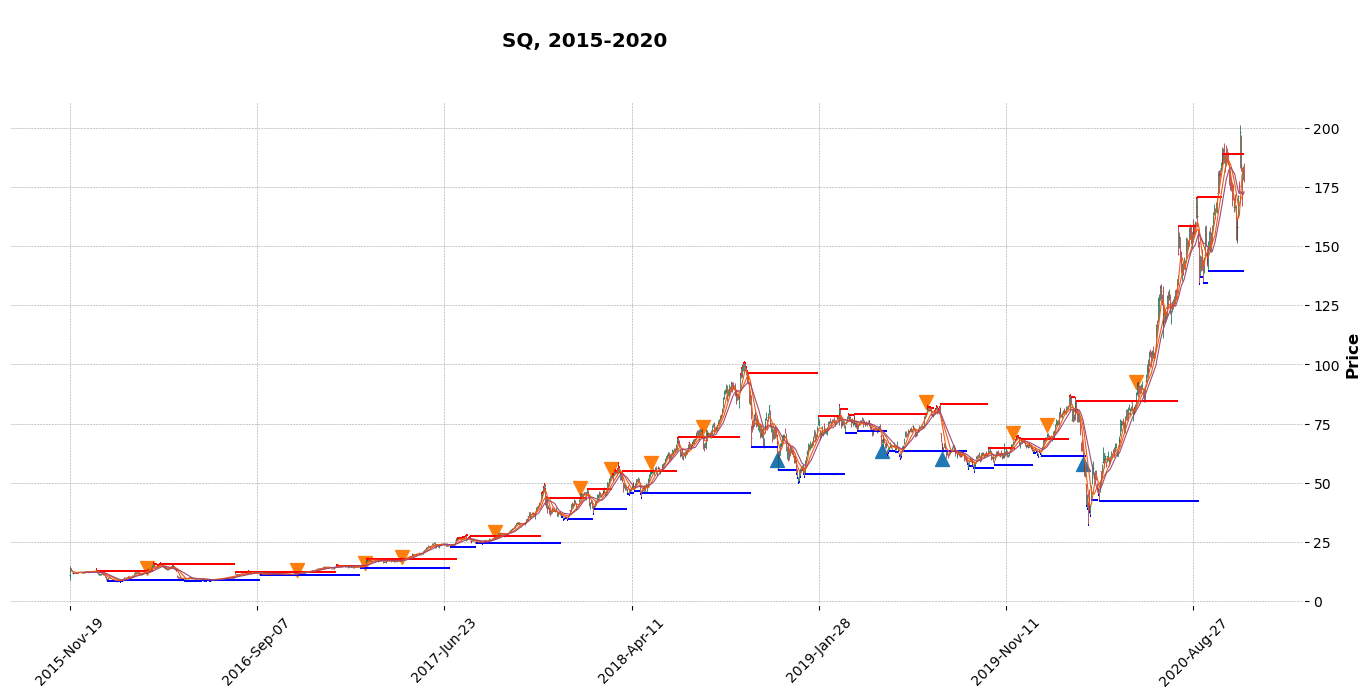

In [92]:
def fplot(stock_code):
    data=get_data(stock_code)
    data1=data.loc['2015-01-01':'2020-11-12']
    data1['50maxH']=data1['High'].rolling(window=50,center=True).max()
    data1['50minL']=data1['Low'].rolling(window=50,center=True).min()
    data1['50meanH']=data1['High'].rolling(window=50,center=True).mean()
    data1['50meanL']=data1['Low'].rolling(window=50,center=True).mean()
    data1['50stdH']=data1['High'].rolling(window=50,center=True).std()
    data1['50stdL']=data1['Low'].rolling(window=50,center=True).std()
    data2=data1.dropna()
    pointsH=[]
    pointsL=[]
    for i in data2.index:
        #if data2['High'][i]-2*data2['50stdH'][i]>data2['50meanH'][i]:
        if data2['High'][i]==data2['50maxH'][i] or data2['High'][i]-data2['50stdH'][i]>data2['50meanH'][i]:
            pointsH.append(str(i)[0:10])
        #if data2['Low'][i]+2*data2['50stdL'][i]<data2['50meanL'][i]:
        if data2['Low'][i]==data2['50minL'][i] or data2['Low'][i]+data2['50stdL'][i]<data2['50meanL'][i]:
            pointsL.append(str(i)[0:10])


    seq_of_pointsH=[
        [(pointsH[i],data.loc[pointsH[i],'High']),(pointsH[i+1],data.loc[pointsH[i],'High'])] for i in range(len(pointsH)-1)
    ]+[[(pointsH[len(pointsH)-1],data.loc[pointsH[len(pointsH)-1],'High']),('2020-11-12',data.loc[pointsH[len(pointsH)-1],'High'])]]    

    seq_of_pointsL=[
        [(pointsL[i],data.loc[pointsL[i],'Low']),(pointsL[i+1],data.loc[pointsL[i],'Low'])] for i in range(len(pointsL)-1)
    ]+[[(pointsL[len(pointsL)-1],data.loc[pointsL[len(pointsL)-1],'Low']),('2020-11-12',data.loc[pointsL[len(pointsL)-1],'Low'])]]  
    seq_of_points=seq_of_pointsH+seq_of_pointsL
    colors=['red' for i in range(len(seq_of_pointsH))]+['blue' for i in range(len(seq_of_pointsL))]


    points_break_up =[] 
    points_break_down =[]

    high_signal=[]
    low_signal=[]
    High=0
    Highi=0
    Low=0
    Lowi=0
    Trans=[]
    for i in range(len(data2)):


        if str(data2.index[i])[0:10] in pointsH:
            High=data2['High'][i]
            Highi=i
        if str(data2.index[i])[0:10] in pointsL:
            Low=data2['Low'][i]
            Lowi=i
        if High !=0:
            if data2['High'][i]>High and i>Highi+25:
                Trans.append(data2['Close'][i])
                points_break_up.append(str(data2.index[i])[0:10])
                High=0
        if Low !=0:
            if data2['Low'][i]<Low and i>Lowi+25:
                Trans.append(-1*data2['Close'][i])
                points_break_down.append(str(data2.index[i])[0:10])
                Low=0


    for i in [str(data.index[j])[0:10] for j in range(len(data))]:

        if i in points_break_up:
            high_signal.append(data.loc[i,'High']*1.05)
        else: high_signal.append(np.nan)
        if i in points_break_down:
            low_signal.append(data.loc[i,'Low']*0.95)
        else: low_signal.append(np.nan)
    apds = [ 
             mpf.make_addplot(low_signal,type='scatter',markersize=100,marker='^'),
             mpf.make_addplot(high_signal,type='scatter',markersize=100,marker='v')
           ]

    mpf.plot(data,style='charles',title='\n%s, 2015-2020'%(stock_code),mav=(5,10,15),figratio=(25,10),figscale=1.25,
            alines=dict(alines=seq_of_points,colors=colors,linewidths=0.2),
            addplot=apds,volume=False) 
fplot('SQ')

[*********************100%***********************]  1 of 1 completed


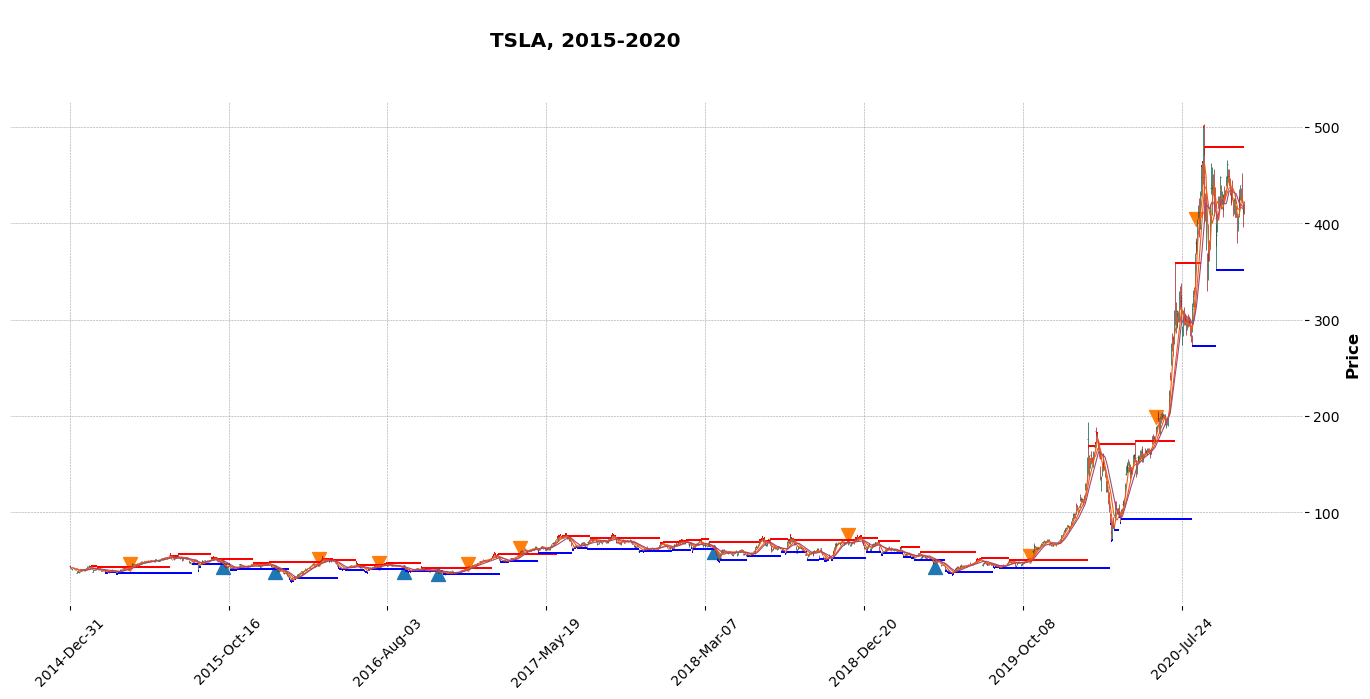

In [93]:
fplot('TSLA')

[*********************100%***********************]  1 of 1 completed


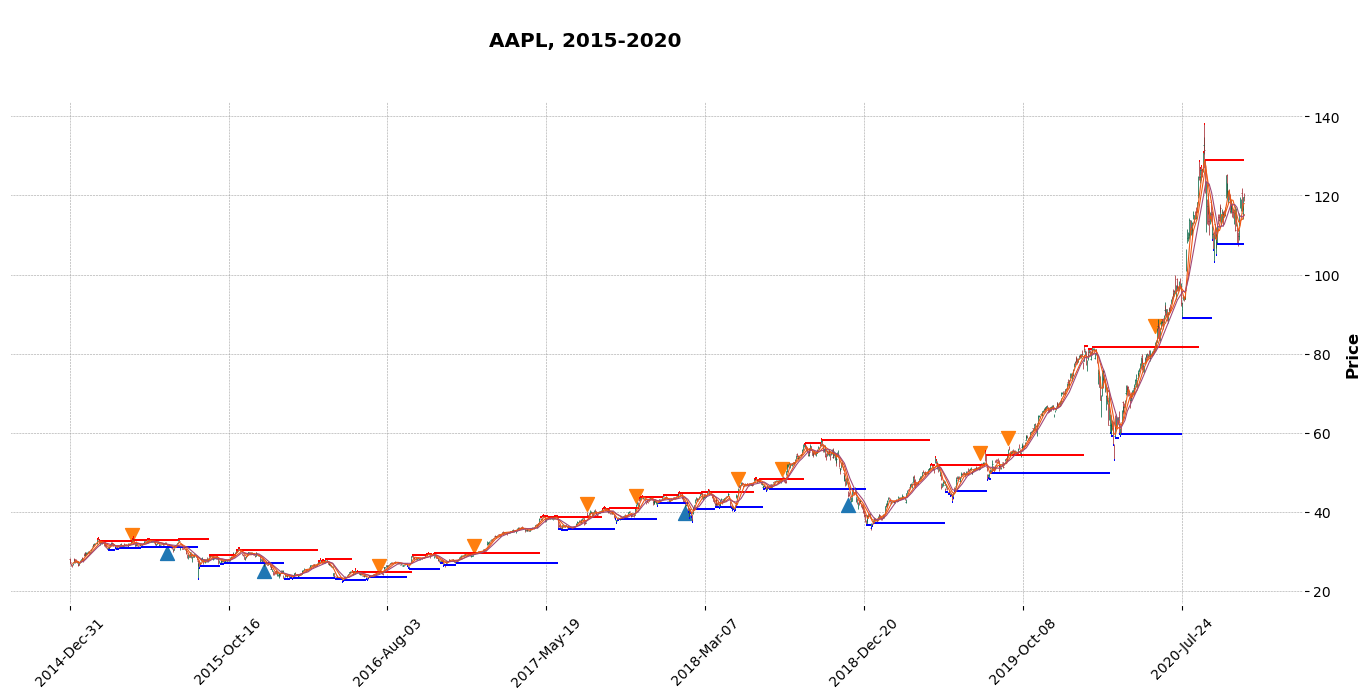

In [94]:
fplot('AAPL')

[*********************100%***********************]  1 of 1 completed


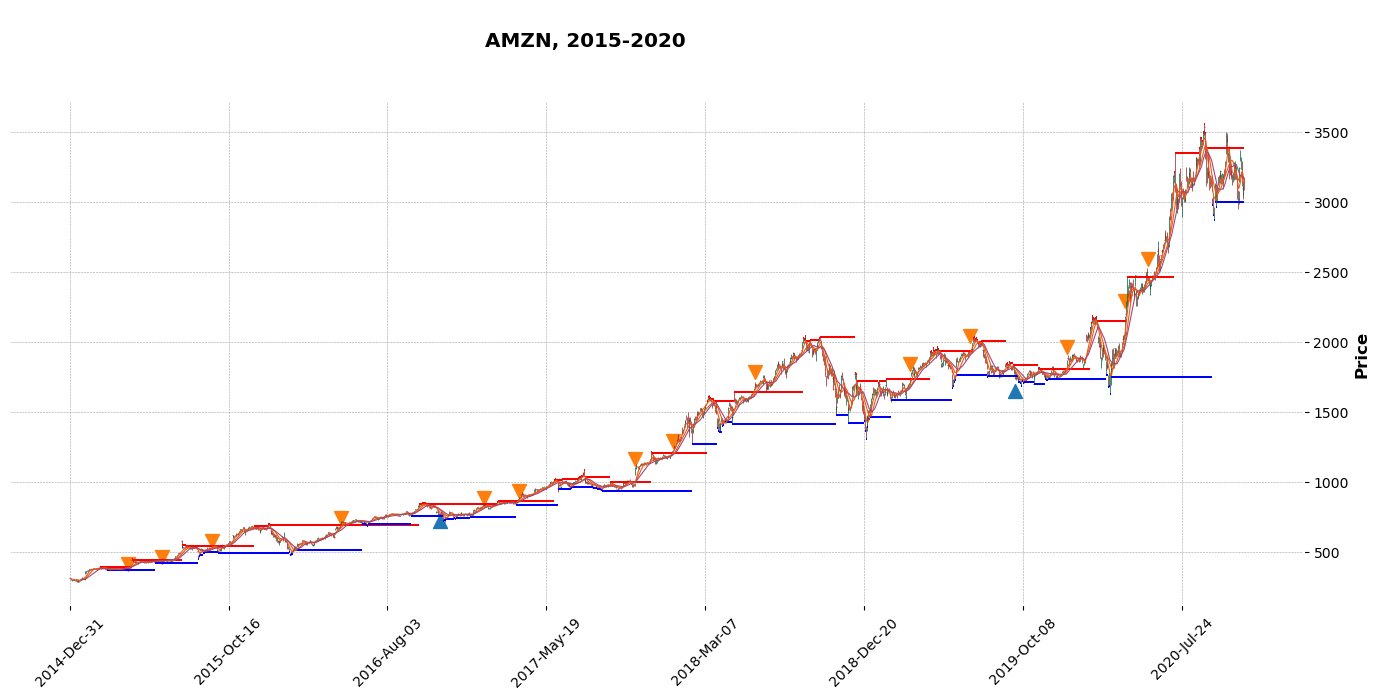

In [95]:
fplot('AMZN')

[*********************100%***********************]  1 of 1 completed


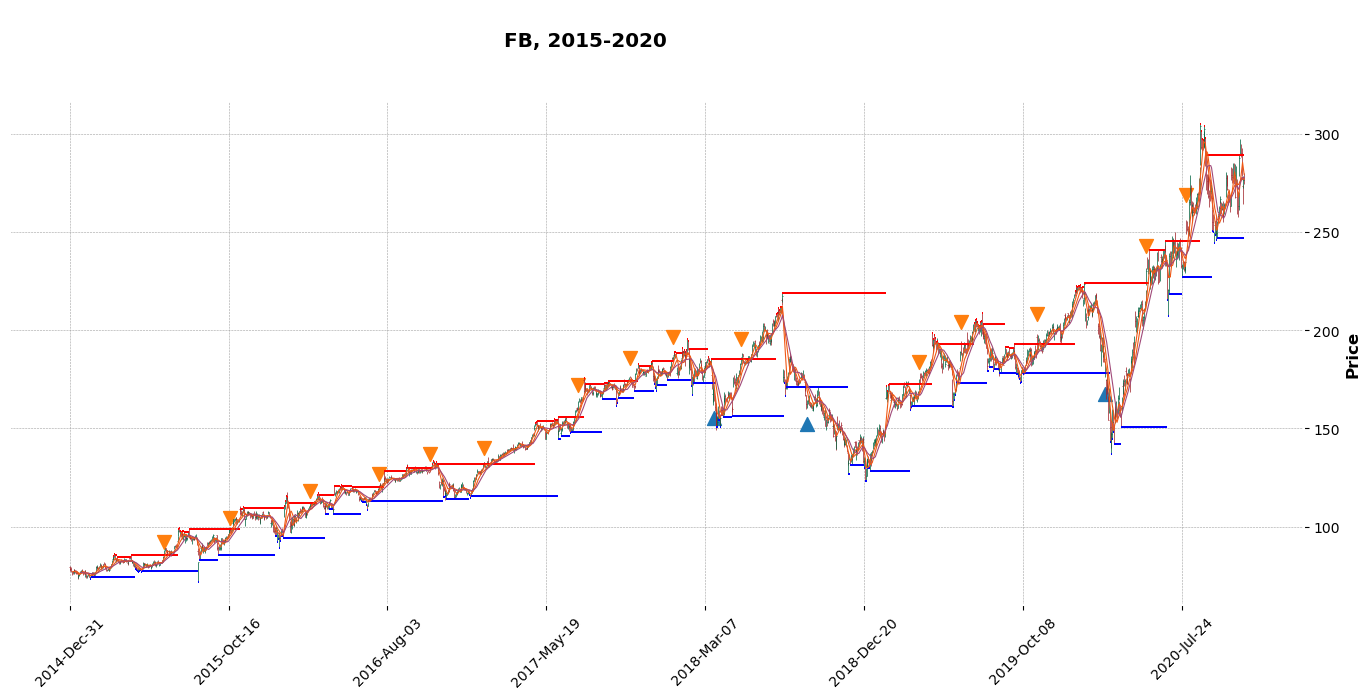

In [96]:
fplot('FB')

[*********************100%***********************]  1 of 1 completed


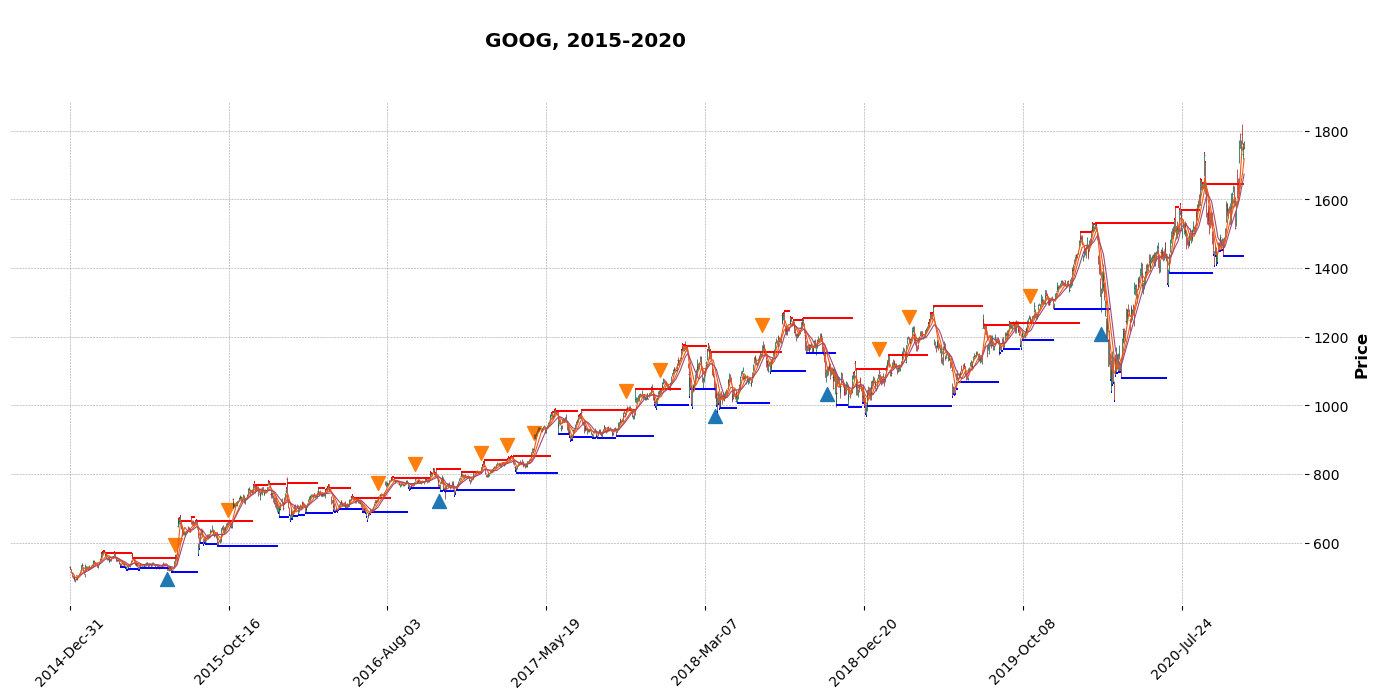

In [97]:
fplot('GOOG')

[*********************100%***********************]  1 of 1 completed


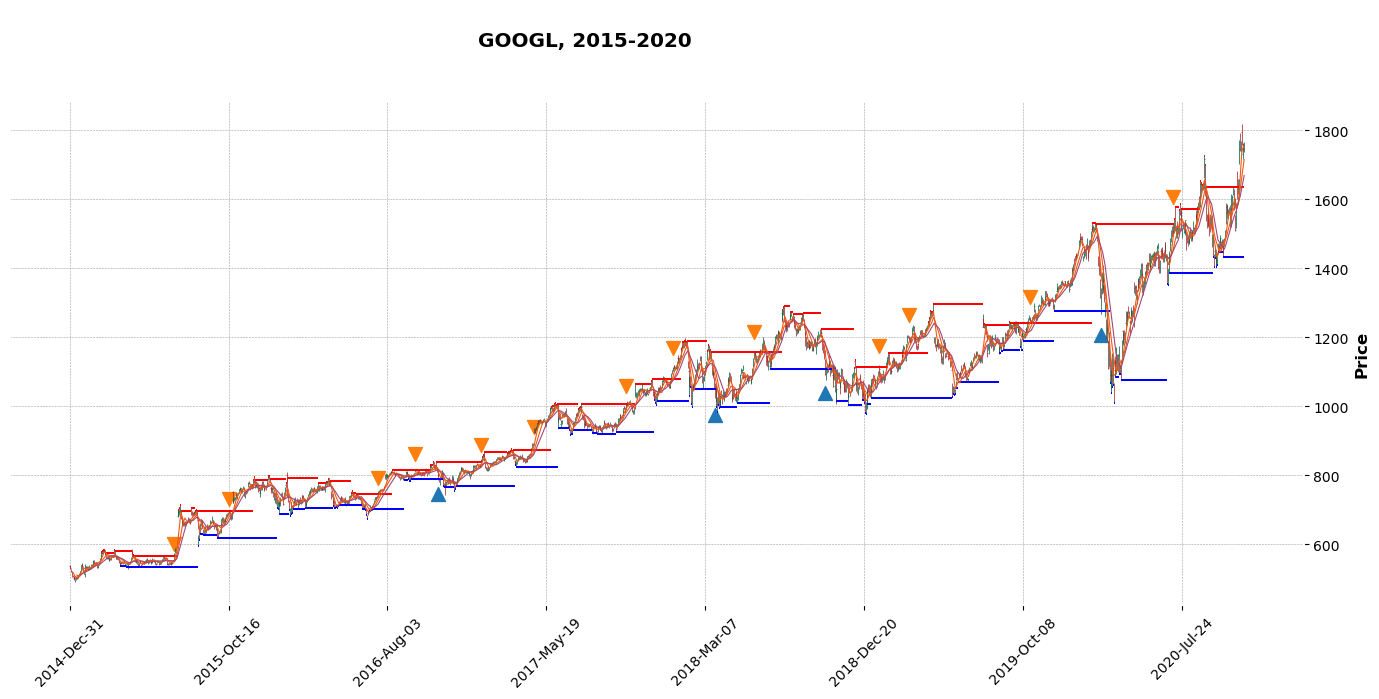

In [98]:
fplot('GOOGL')

[*********************100%***********************]  1 of 1 completed


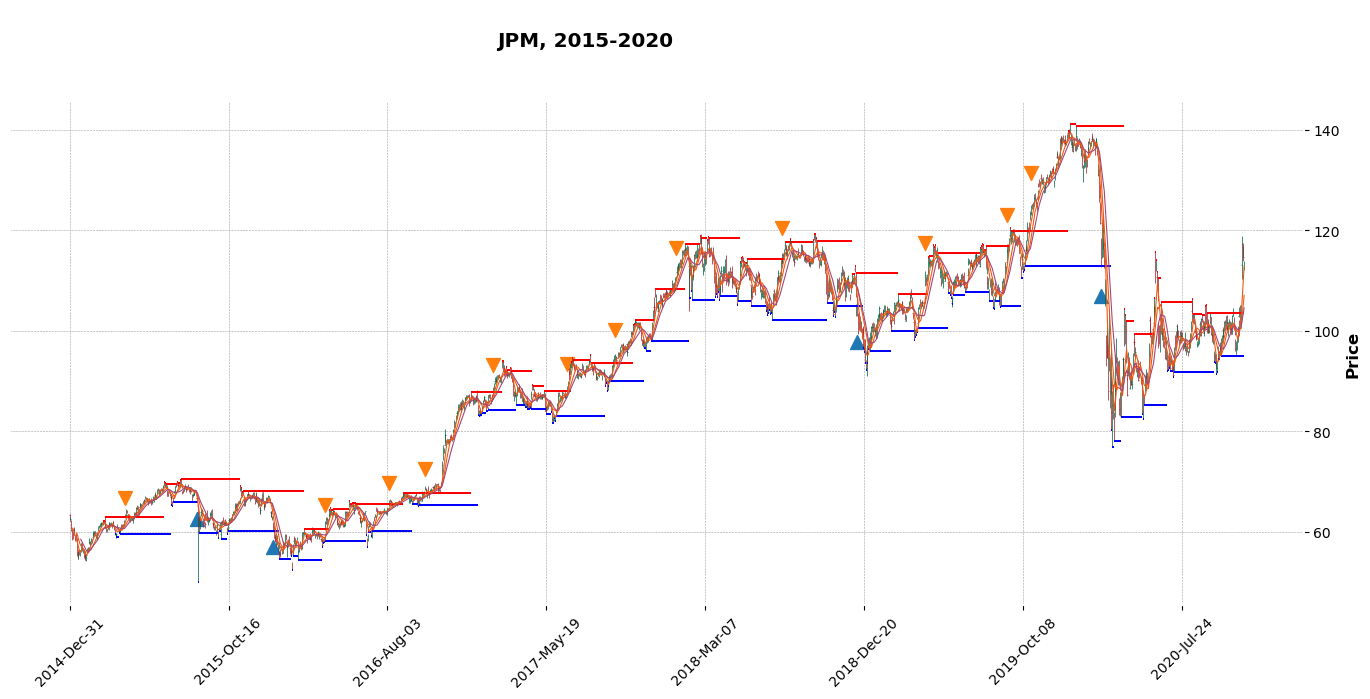

In [99]:
fplot('JPM')

[*********************100%***********************]  1 of 1 completed


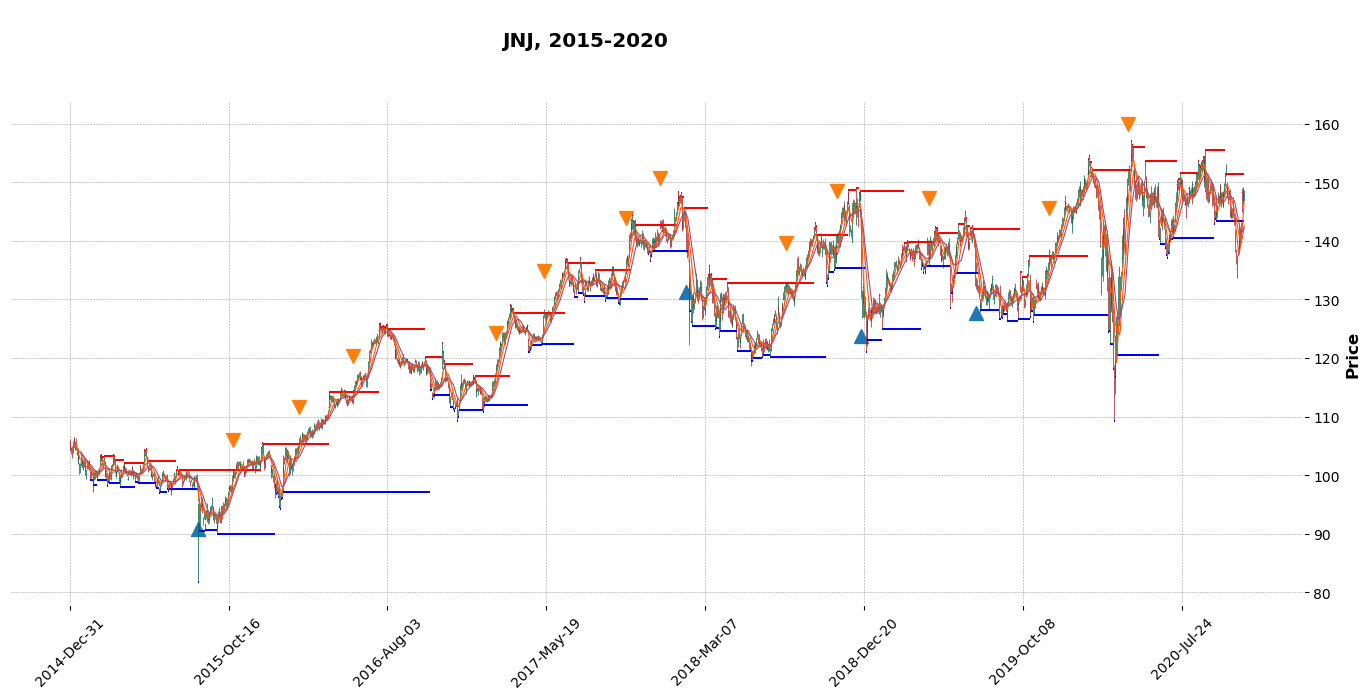

In [100]:
fplot('JNJ') #强生

[*********************100%***********************]  1 of 1 completed


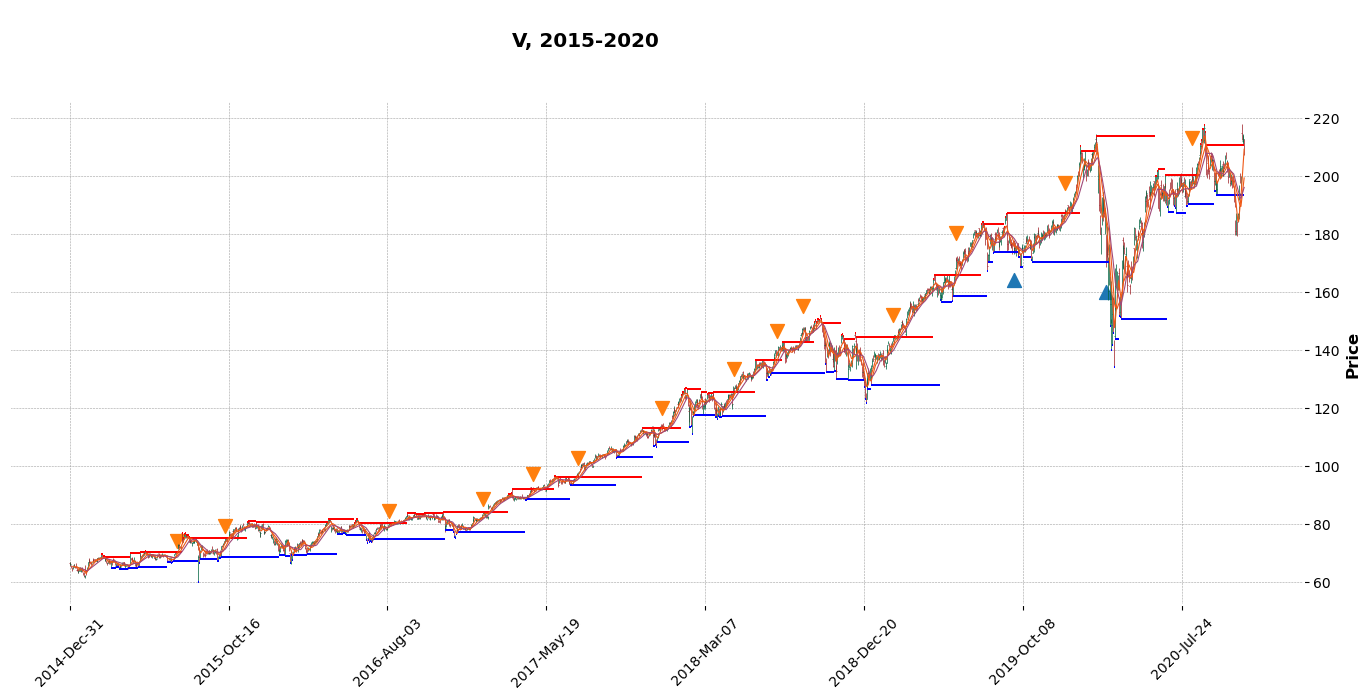

In [101]:
fplot('V') #VISA